# Exploratory Data Analysis for the Dataset of Market used cars in Germany 

In [2]:
#Importing the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from datetime import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import category_encoders as ce


%matplotlib inline

In [3]:
#cleaned dataset 

df = pd.read_csv("auto_data_cleaned_16_09_2024.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238302 entries, 0 to 238301
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     238302 non-null  object 
 1   model                     238302 non-null  object 
 2   color                     238221 non-null  object 
 3   year                      238302 non-null  float64
 4   price_in_euro             238302 non-null  float64
 5   power_ps                  238302 non-null  float64
 6   transmission_type         238302 non-null  object 
 7   fuel_type                 238302 non-null  object 
 8   fuel_consumption_l_100km  238302 non-null  float64
 9   mileage_in_km             238302 non-null  float64
 10  offer_description         238302 non-null  object 
 11  age                       238302 non-null  float64
dtypes: float64(6), object(6)
memory usage: 21.8+ MB


## The most popular brands and models in Germany

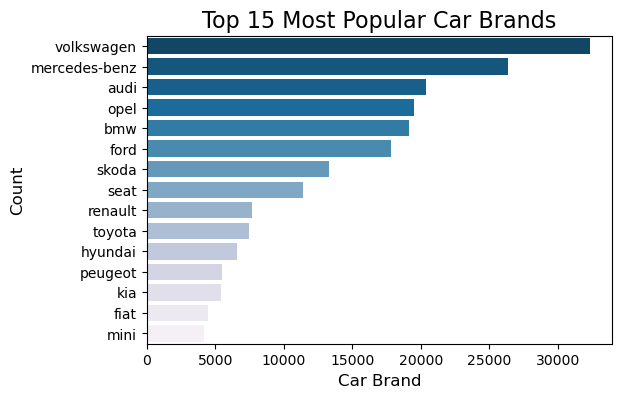

In [4]:
### Count the occurrences of each car model
brand_counts = df['brand'].value_counts()

# Select the top 10 most popular models
top_brands = brand_counts.head(15).index

# Filter the dataframe to include only the top 10 models
filtered_df = df[df['brand'].isin(top_brands)]

# Create the count plot
plt.figure(figsize=(6,4))
sns.countplot(data=filtered_df, y='brand', order=top_brands, palette='PuBu_r')

# Set labels and title
plt.title('Top 15 Most Popular Car Brands', fontsize=16)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

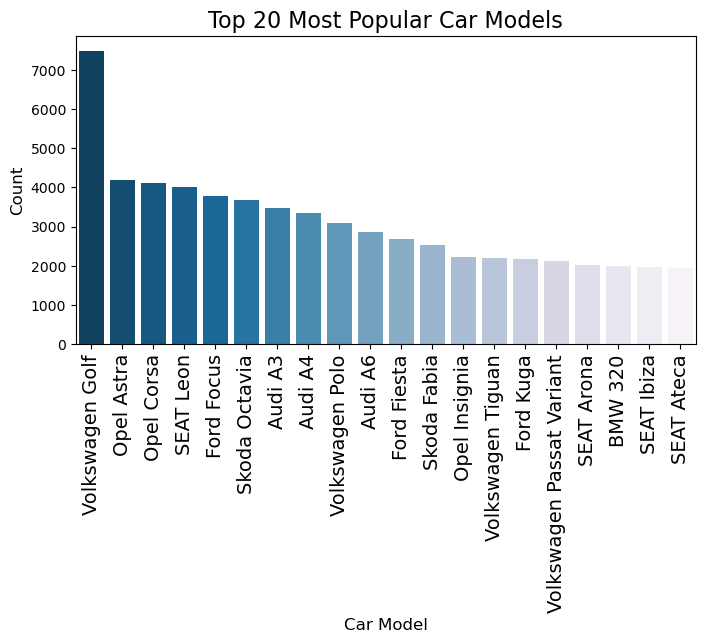

In [160]:
# Count the occurrences of each car model
model_counts = df['model'].value_counts()

# Select the top 10 most popular models
top_models = model_counts.head(20).index

# Filter the dataframe to include only the top 10 models
filtered_df = df[df['model'].isin(top_models)]

# Create the count plot
plt.figure(figsize=(8,4))
sns.countplot(data=filtered_df, x='model', order=top_models, palette='PuBu_r')

# Set labels and title
plt.title('Top 20 Most Popular Car Models', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=14, rotation=90)
plt.show();

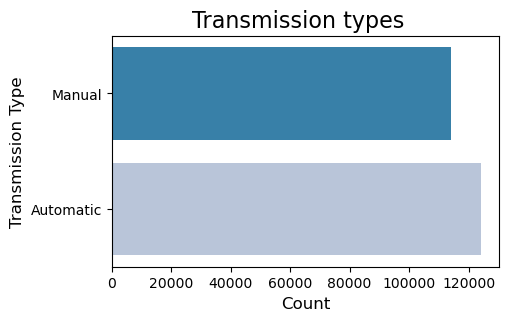

In [6]:
#Count plot for transmission types

fig=plt.figure(figsize=(5, 3))
sns.countplot(y=df.transmission_type.loc[df['transmission_type']!='Semi-automatic'], palette='PuBu_r')
plt.title('Transmission types  ', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transmission Type', fontsize=12)
plt.show();

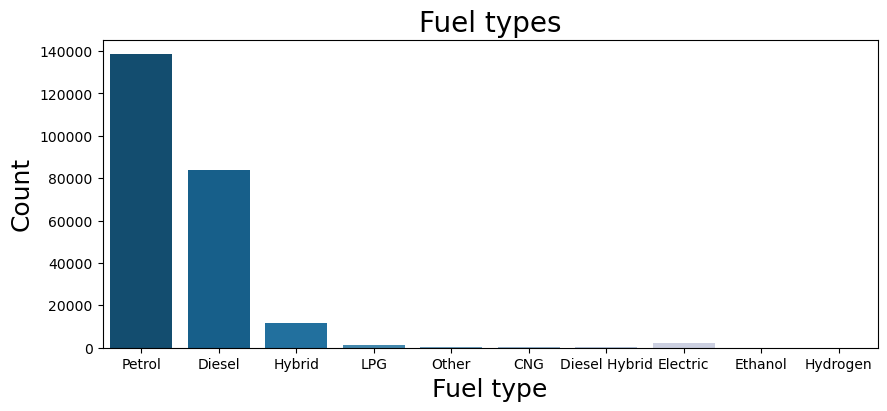

In [7]:
### Count plot for fuel types
fig=plt.figure(figsize=(10, 4))
sns.countplot(x=df.fuel_type, palette='PuBu_r')
plt.title('Fuel types', fontsize=20)
plt.xlabel('Fuel type', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show();

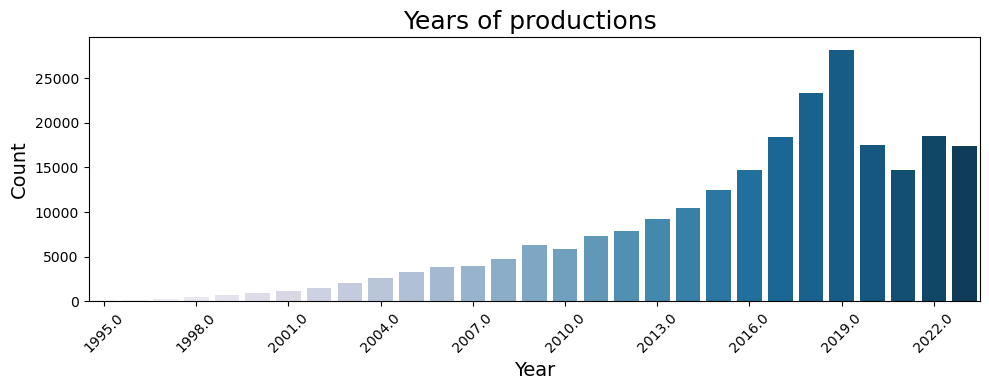

In [10]:
from matplotlib.ticker import MaxNLocator
#Count plot for fuel types
fig=plt.figure(figsize=(10, 4))
sns.countplot(x=df.year, palette='PuBu')
plt.title('Years of productions ',fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Year', fontsize=14)
# Use MaxNLocator to ensure tick labels are integers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Count', fontsize=14)
# Add a legend to distinguish between "All Brands" and the highlighted brands
#plt.legend(title='Brand', loc='upper left')
plt.tight_layout()  # Adjust layout to avoid clipping
  # Improves layout for better spacing
plt.show();

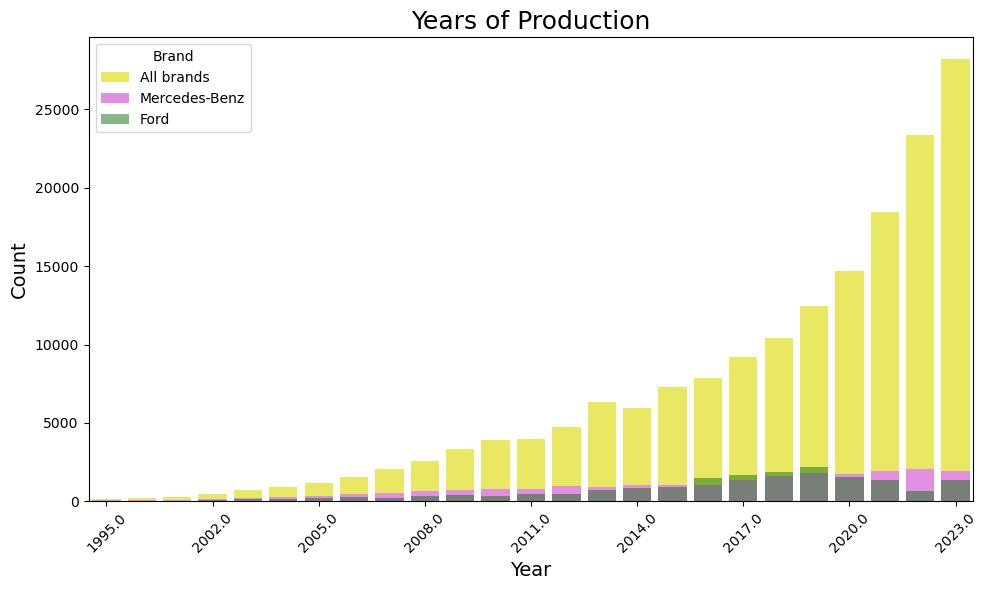

In [82]:
# Count plot for fuel types with rotated x-axis labels and integer year format
fig = plt.figure(figsize=(10, 6))  # Adjusted figsize to make it more horizontal
sns.countplot(x=df.year, color='yellow', label='All brands',dodge=True, alpha=0.7)
sns.countplot(x='year', data=df[df['brand'] == 'mercedes-benz'], color='violet', label='Mercedes-Benz')
sns.countplot(x='year', data=df[df['brand'] == 'ford'], color='green', label='Ford', alpha=0.5)
plt.title('Years of Production', fontsize=18)

# Rotate x-axis labels and remove decimal points
plt.xticks(rotation=45)  # Rotate labels by 45 degrees for better readability
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))



plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Add a legend to distinguish between "All Brands" and the highlighted brands
plt.legend(title='Brand', loc='upper left')
plt.tight_layout()  # Adjust layout to avoid clipping
  # Improves layout for better spacing
plt.show()

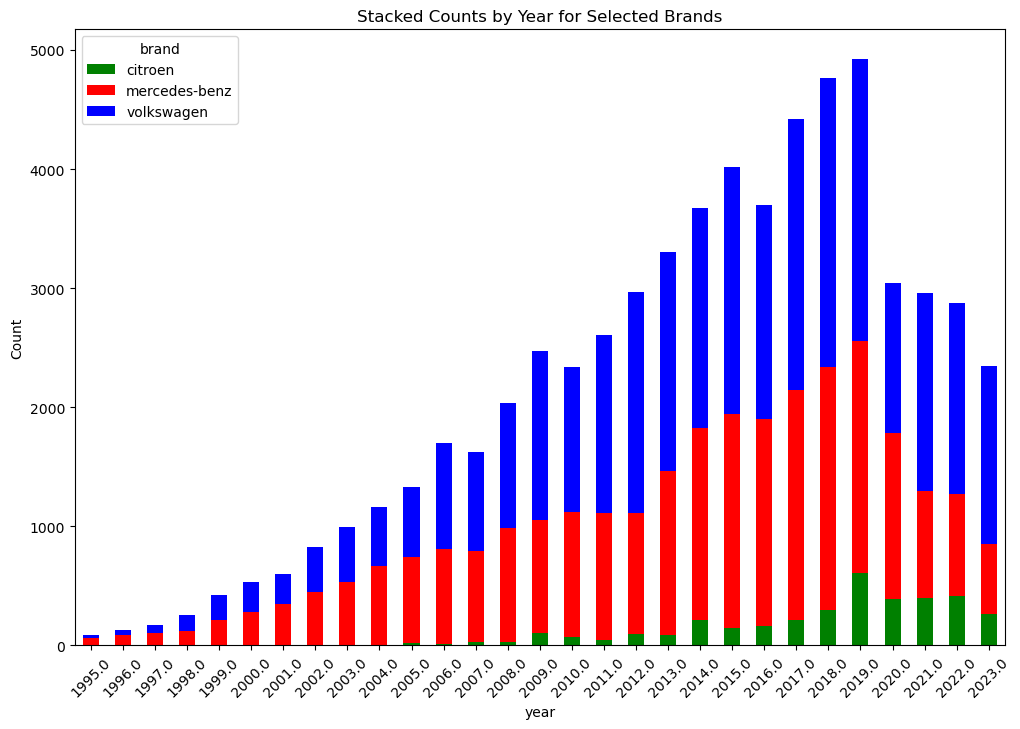

In [12]:
# Aggregate counts
count_data = df[df['brand'].isin(['mercedes-benz', 'volkswagen', 'citroen'])]
count_data = count_data.groupby(['year', 'brand']).size().unstack(fill_value=0)

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, color=['green','red', 'blue', 'violet'], figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Stacked Counts by Year for Selected Brands')
plt.show()

### From the plot we can see that a lot of cars which are 5-6 years old are on market (year 2018-2019)

# Plots for prices

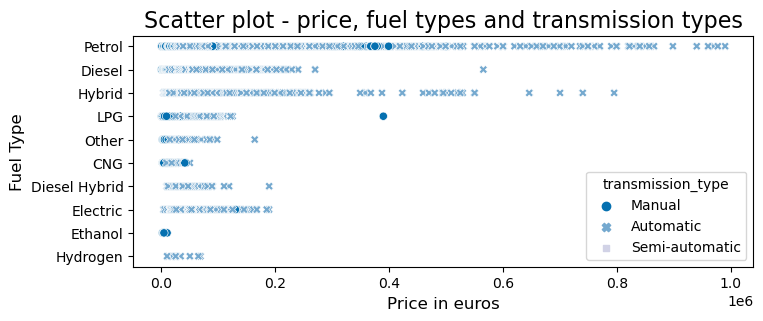

In [18]:
#Scatter plot between price and transmission type
#Here we limit dataset with the car cheaper than 100 000 Euro)

fig=plt.figure(figsize=(8,3))
sns.scatterplot(data=df.loc[df['price_in_euro']< 1000000], x='price_in_euro',y='fuel_type', hue='transmission_type', style='transmission_type', palette='PuBu_r')
plt.title('Scatter plot - price, fuel types and transmission types', fontsize=16)

plt.xlabel('Price in euros', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)

plt.show();
             

### Automatic transmission cars are in general more expensive than manual. The cars with particluar types of fuel are never too expensive (ethanol, CNG). Diesel Hybrid and Hybrid cars have tendency to be more expensive, and almost never have manual transmission

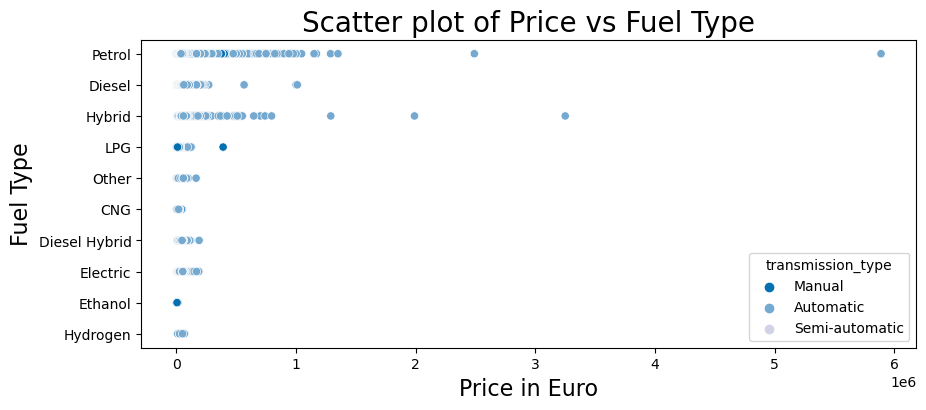

In [17]:
#To see whole picture I will do the same plot but for all teh car in the df
# Assuming you have a DataFrame 'df' with columns 'price_in_euro', 'fuel_type', and 'transmission_type'

plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='price_in_euro', y='fuel_type', hue='transmission_type', palette='PuBu_r')

plt.title('Scatter plot of Price vs Fuel Type', fontsize=20)
plt.xlabel('Price in Euro', fontsize=16)
plt.ylabel('Fuel Type', fontsize=16)

plt.show()

### We see , diesel relatively cheaper than the petrol cars. Lets see another plot - average prices for the different fuel types.

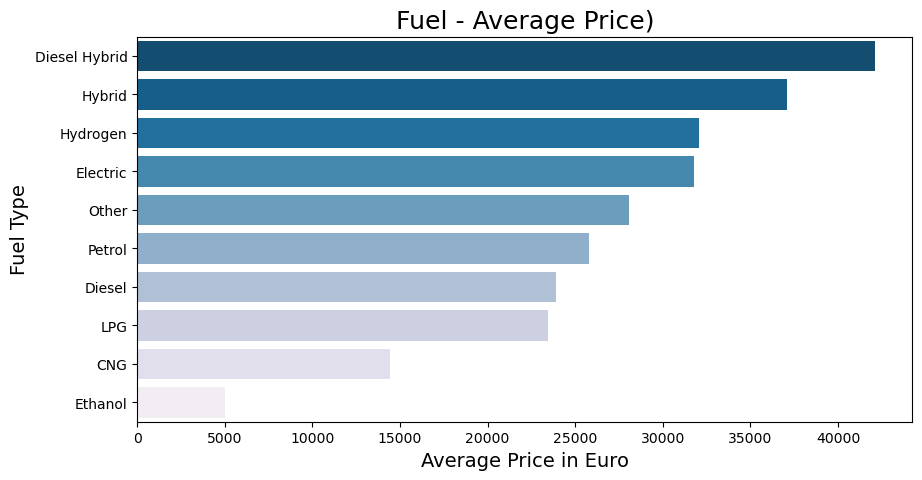

In [22]:
#By the average

# Step 1: Group by 'brand' and calculate the mean price
fuel_avg_price = df.groupby('fuel_type')['price_in_euro'].mean().reset_index()

# Step 2: Sort the brands by the average price
fuel_avg_price_sorted = fuel_avg_price.sort_values(by='price_in_euro', ascending=False)


# Step 3: Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='price_in_euro', y='fuel_type', data=fuel_avg_price_sorted, palette='PuBu_r')

# Step 4: Customize the plot
plt.title('Fuel - Average Price)', fontsize=18)
plt.xlabel('Average Price in Euro', fontsize=14)
plt.ylabel('Fuel Type', fontsize=14)

plt.show()

## If to plot average prices for fuel types, we can see that the most expensive are the hybrid, Hydrogen and HYbrid cars, but it is not a reality. From previous plot, is is obvious that pertol car can are the most expensive (for the price the hybrid and hydrogen cars, for example, nevere have) (and obviously can be very cheap)

## Correlation matrix for the numerical features

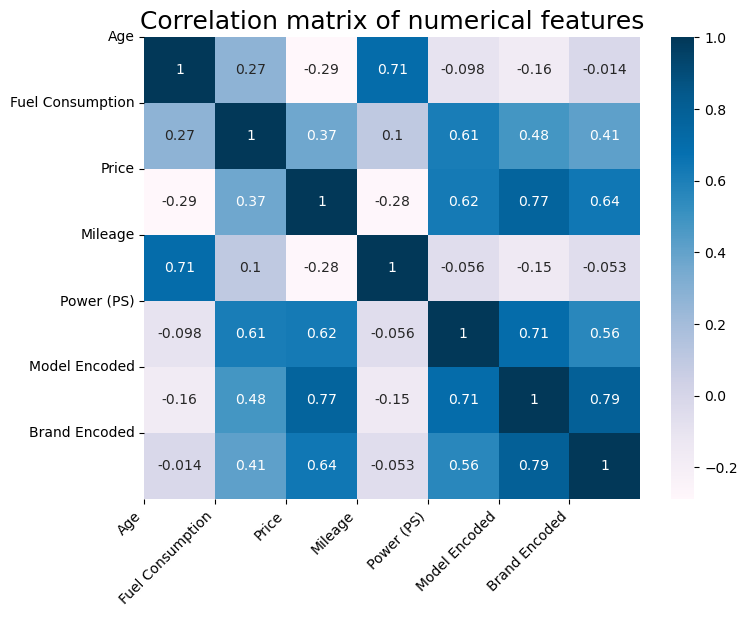

In [27]:
# the models will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['model'])
df['Modell_encoded'] = target_encoder.fit_transform(df['model'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


# the brand will be encoded by mean value of price of every model
target_encoder = ce.TargetEncoder(cols=['brand'])
df['Brand_encoded'] = target_encoder.fit_transform(df['brand'], df['price_in_euro'])  # 'Preis' ist die Zielvariable


numerical=df[['age', 'fuel_consumption_l_100km', 'price_in_euro','mileage_in_km', 'power_ps', 'Modell_encoded', 'Brand_encoded']]

corr_matrix = numerical.corr()

# Define custom labels
custom_labels = {
    'age': 'Age',
    'fuel_consumption_l_100km': 'Fuel Consumption',
    'price_in_euro': 'Price',
    'mileage_in_km': 'Mileage',
    'power_ps': 'Power (PS)',
    'Modell_encoded': 'Model Encoded',
    'Brand_encoded': 'Brand Encoded'}

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
# Customize x and y axis labels
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=[custom_labels.get(label, label) for label in corr_matrix.columns], rotation=45, ha='right')
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=[custom_labels.get(label, label) for label in corr_matrix.columns], rotation=0)

plt.title('Correlation matrix of numerical features', fontsize=18)

plt.show()

## Mileage and Age: Both factors have moderate negative correlations with price, meaning as they increase, the price decreases, which is in line with the expected depreciation of a car. Power: This is the most influential factor, showing a strong positive correlation with price. Buyers are likely paying more for performance. Fuel Consumption: While there is a moderate positive correlation, this may reflect the fact that larger or more powerful cars, which consume more fuel, tend to be priced higher.


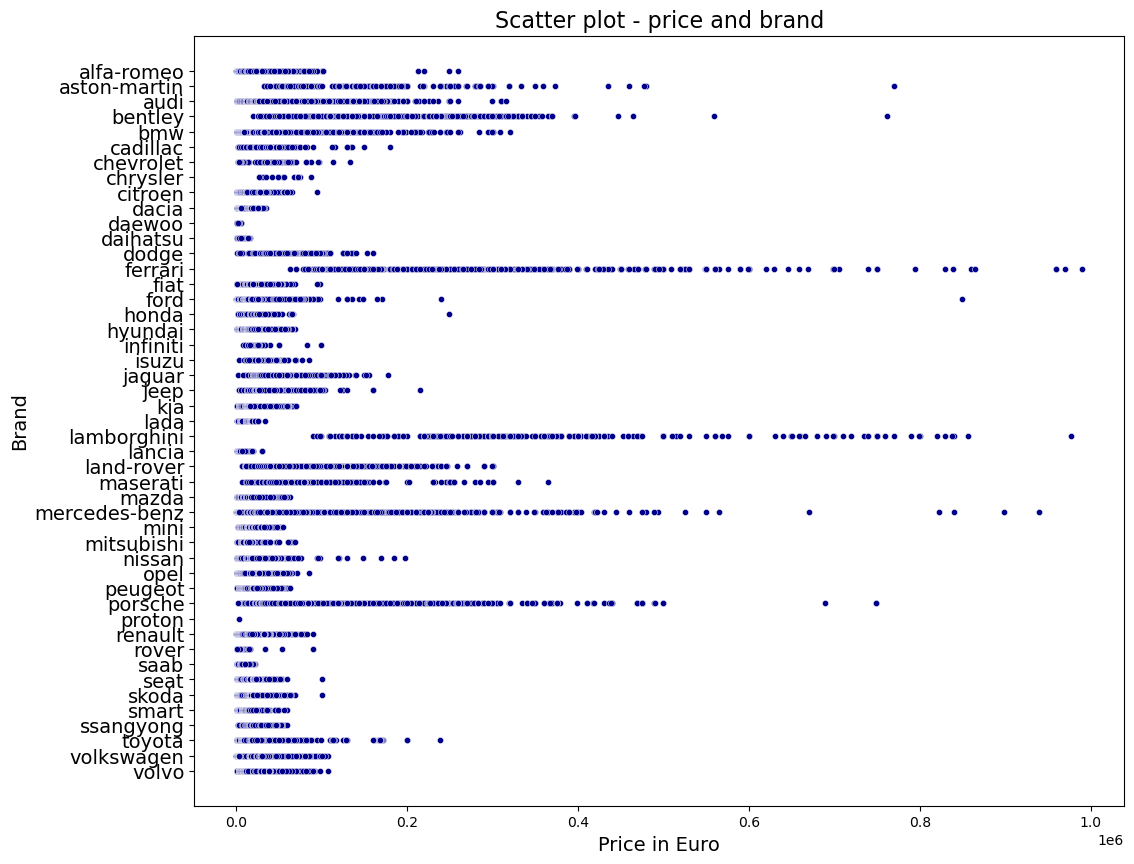

In [85]:
#Scatter plot between price and brand

fig=plt.figure(figsize=(12,10))
sns.scatterplot(data=df.loc[df['price_in_euro']<1000000], y='brand',x='price_in_euro',s=20, color='darkblue')
plt.title('Scatter plot - price and brand', fontsize=16)

plt.xlabel('Price in Euro', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.yticks(fontsize=14)
plt.show();
              

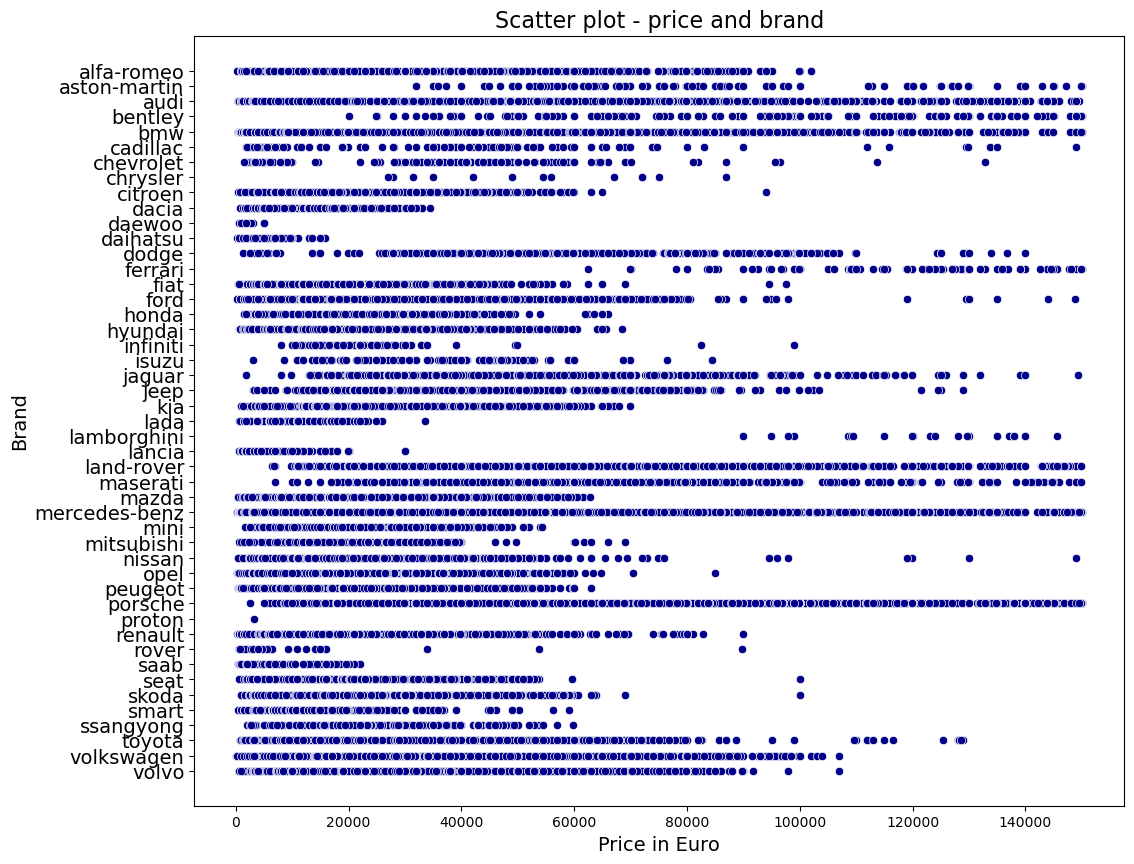

In [86]:
#Scatter plot between price and brand
#focus on the cars with price up tpo 150 000

fig=plt.figure(figsize=(12,10))
sns.scatterplot(data=df.loc[df['price_in_euro']<150000], y='brand',x='price_in_euro', color='darkblue')
plt.title('Scatter plot - price and brand', fontsize=16)

plt.xlabel('Price in Euro', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.yticks(fontsize=14)
plt.show();
             

## What are the most expensive brands

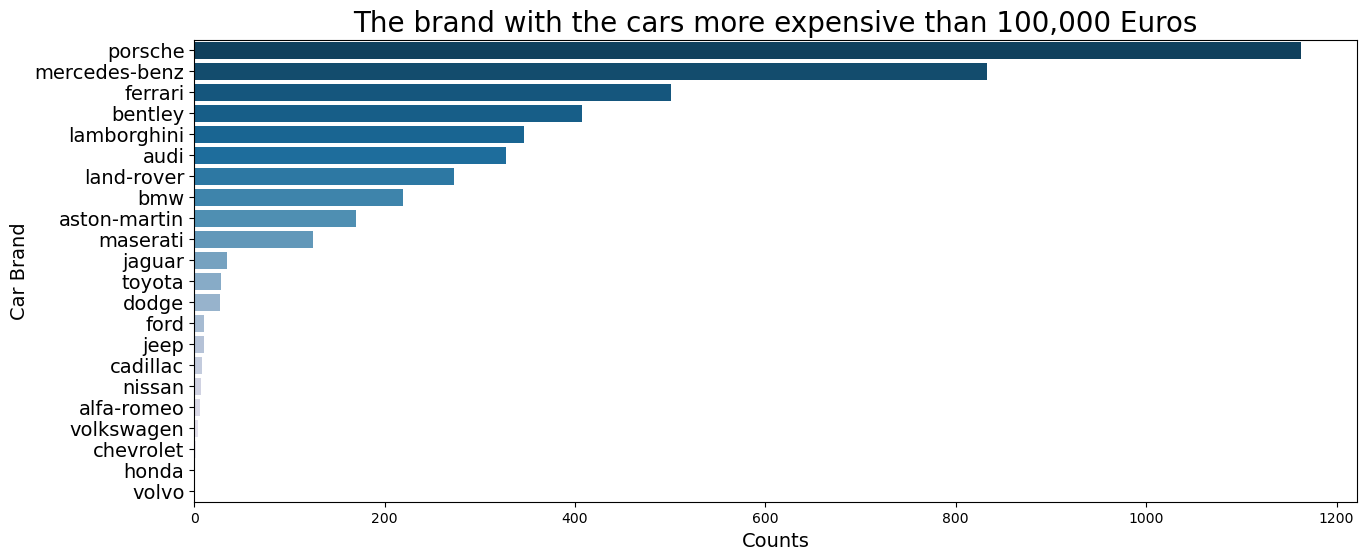

In [150]:
fig = plt.figure(figsize=(15, 6))
most_euro = df.loc[df['price_in_euro'] > 100000]

# Get the counts of each brand and sort them
brand_counts = most_euro['brand'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted order
sns.countplot(y=most_euro['brand'], order=brand_counts.index, palette ='PuBu_r')
plt.title('The brand with the cars more expensive than 100,000 Euros', fontsize=20)
plt.xlabel('Counts', fontsize = 14)
plt.ylabel('Car Brand', fontsize = 14)
plt.yticks(fontsize=14)
plt.show()





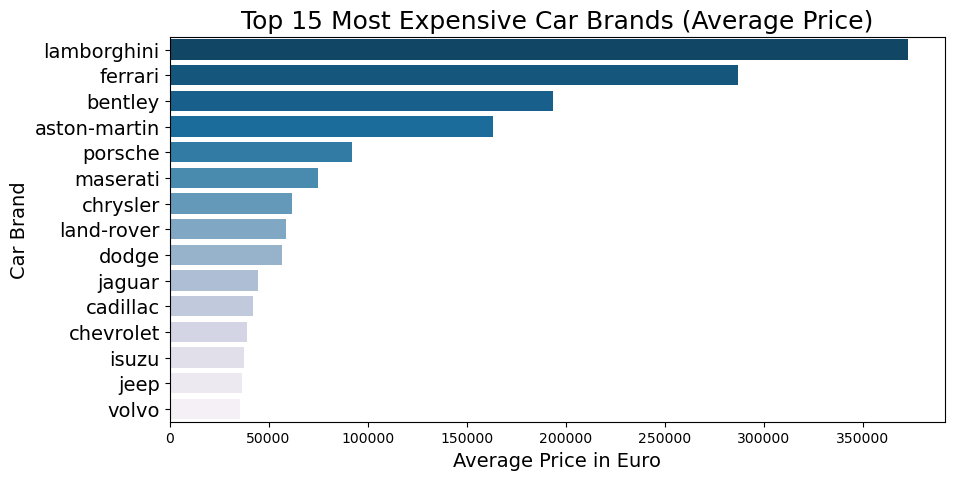

In [155]:
### By the average

# Step 1: Group by 'brand' and calculate the mean price
brand_avg_price = df.groupby('brand')['price_in_euro'].mean().reset_index()

# Step 2: Sort the brands by the average price
brand_avg_price_sorted = brand_avg_price.sort_values(by='price_in_euro', ascending = False)
# Step 3: Select the top 10 most expensive brands
top_brands = brand_avg_price_sorted.head(15)

# Step 4: Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='price_in_euro', y='brand', data=top_brands, palette='PuBu_r')

# Step 5: Customize the plot
plt.title('Top 15 Most Expensive Car Brands (Average Price)', fontsize = 18)
plt.xlabel('Average Price in Euro', fontsize = 14)
plt.yticks(fontsize=14)
plt.ylabel('Car Brand', fontsize = 14)

plt.show();

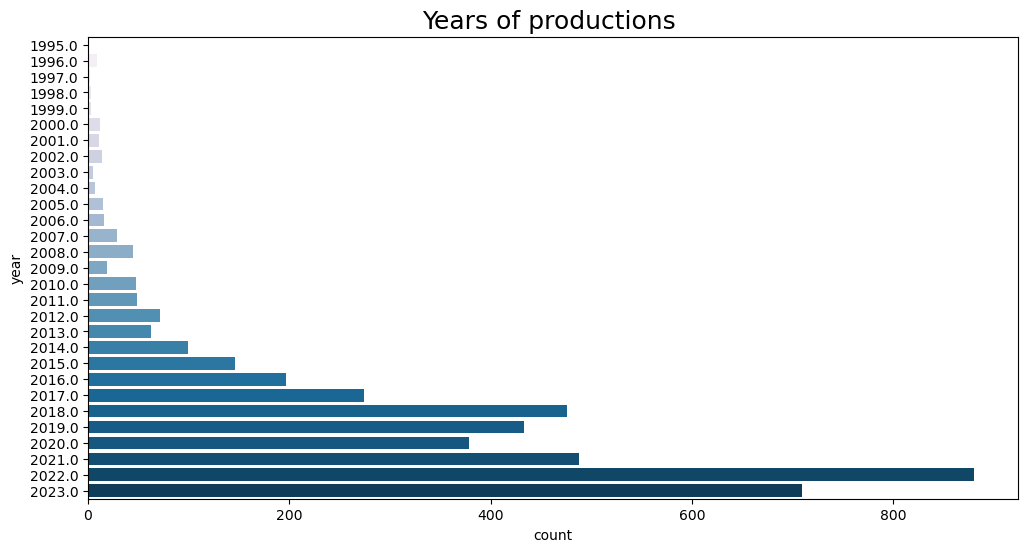

In [89]:
#Count plot for fuel types
fig=plt.figure(figsize=(12, 6))
sns.countplot(y=most_euro.year, palette='PuBu')
plt.title('Years of productions ',fontsize=18)
plt.show();

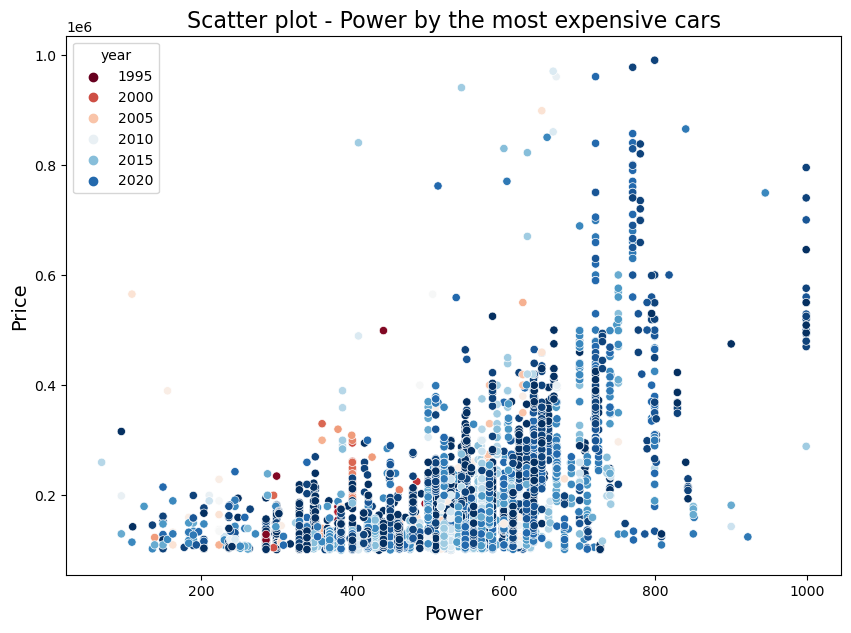

In [97]:
### Scatter plot between price and mileage

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=most_euro.loc[most_euro['price_in_euro']<1000000], x='power_ps',y='price_in_euro', palette='RdBu', hue='year')
plt.title('Scatter plot - Power by the most expensive cars', fontsize=16)
plt.xlabel('Power', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show();
             

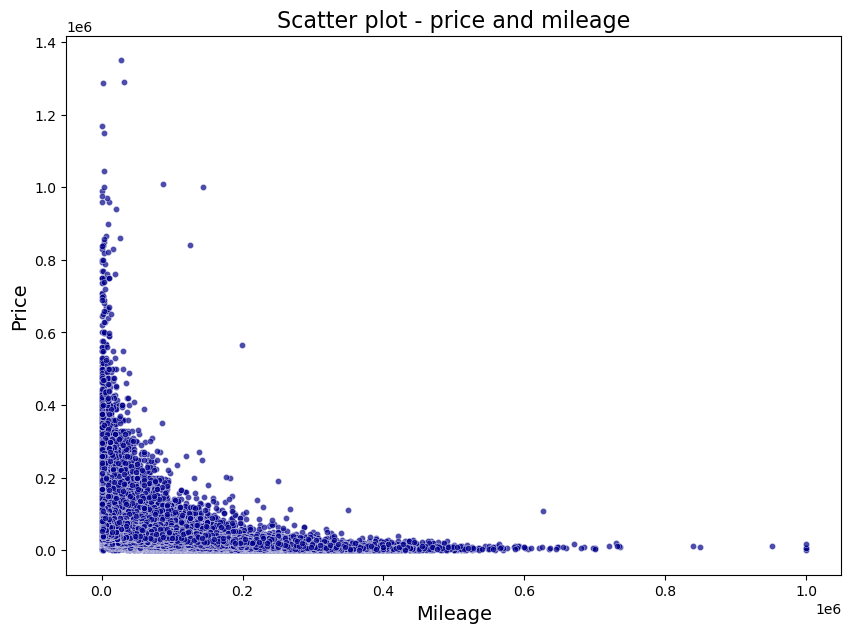

In [100]:
### Scatter plot between price and mileage
df_red=df.loc[(df['mileage_in_km']<1000000) & (df['price_in_euro']<1500000)]

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df_red, x='mileage_in_km',y='price_in_euro',s=20,  color='darkblue', alpha=0.7)
plt.title('Scatter plot - price and mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show();
              

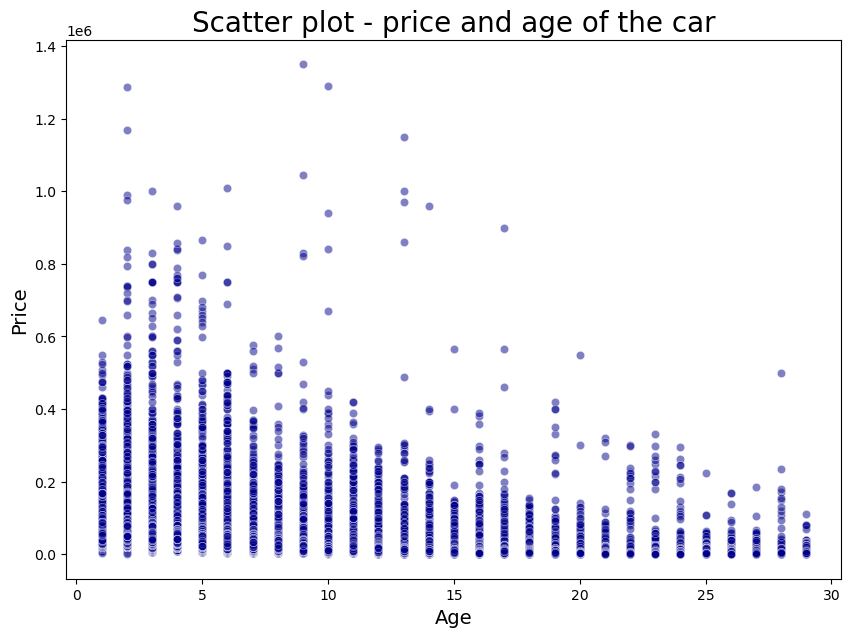

In [102]:
#Scatter plot between price and age

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df.loc[df['price_in_euro']<1500000], x='age',y='price_in_euro', color='darkblue', alpha=0.5)
plt.title('Scatter plot - price and age of the car', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show();
             

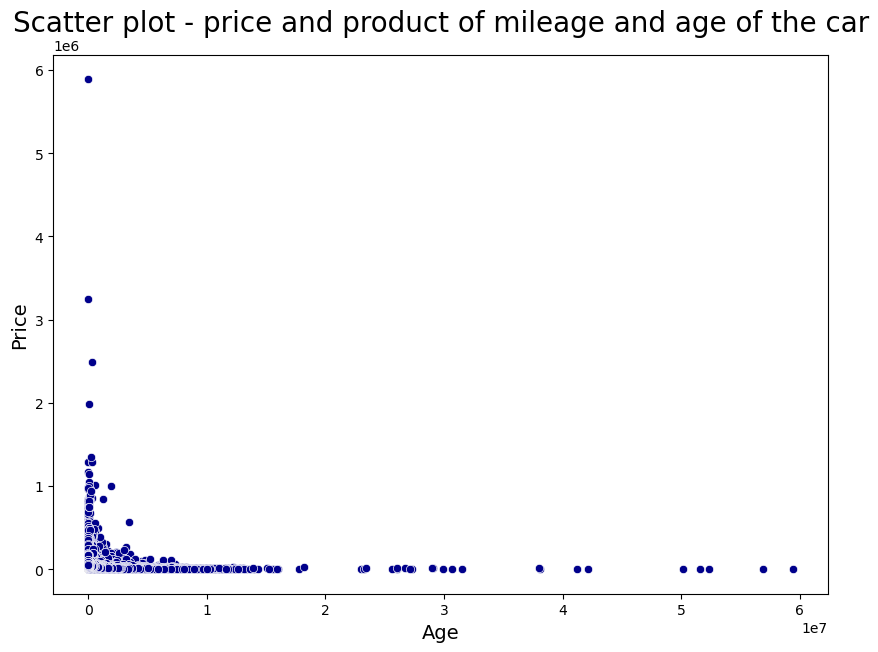

In [149]:
df['mileage_age']=df['mileage_in_km']*df['age']

#Scatter plot between price and age

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='mileage_age',y='price_in_euro', color='darkblue')
plt.title('Scatter plot - price and product of mileage and age of the car', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show();
           

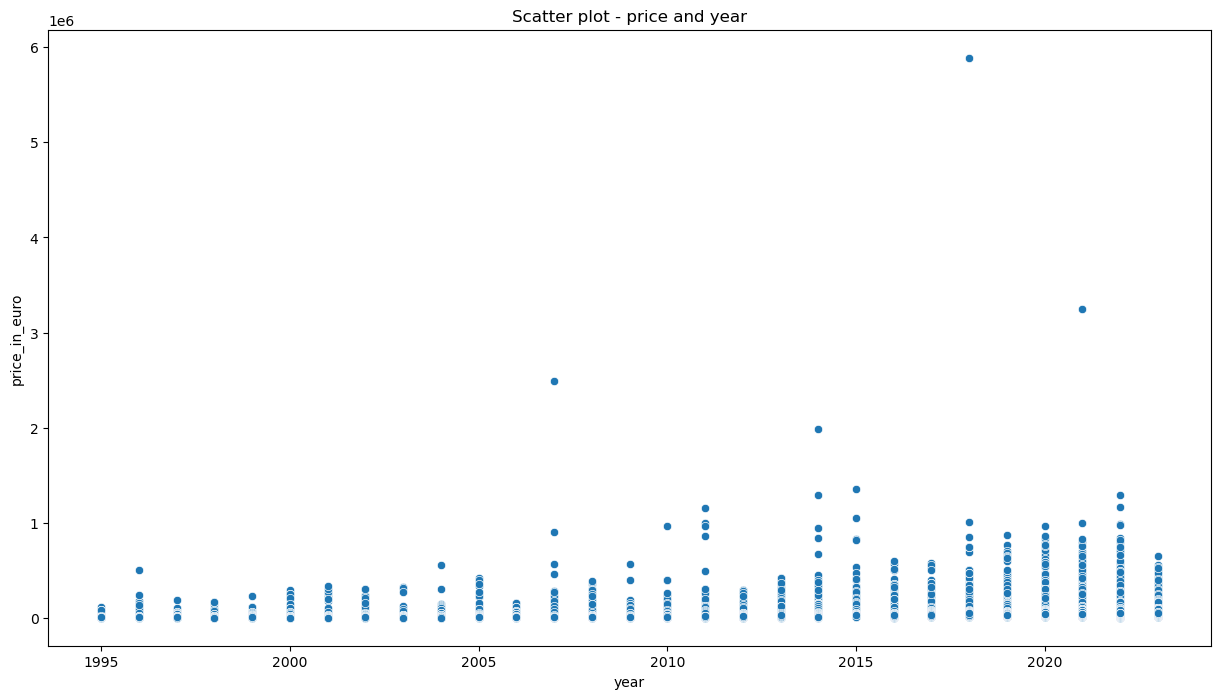

In [35]:
### Scatter plot between price and year

fig=plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='year',y='price_in_euro')
plt.title('Scatter plot - price and year')
plt.show();

In [20]:
millions=df.loc[df['price_in_euro']>1500000]
millions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1490 to 161682
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     7 non-null      object 
 1   model                     7 non-null      object 
 2   color                     7 non-null      object 
 3   registration_date         7 non-null      object 
 4   year                      7 non-null      int64  
 5   price_in_euro             7 non-null      float64
 6   power_kw                  7 non-null      float64
 7   power_ps                  7 non-null      float64
 8   transmission_type         7 non-null      object 
 9   fuel_type                 7 non-null      object 
 10  fuel_consumption_l_100km  7 non-null      float64
 11  fuel_consumption_g_km     7 non-null      object 
 12  mileage_in_km             7 non-null      float64
 13  offer_description         7 non-null      object 
 14  age        

In [22]:
millions.head(10)

brand               model  color registration_date  year  \
1490     aston-martin        Aston Martin  brown           08/2011  2011   
91430     lamborghini         Lamborghini   grey           08/2018  2018   
91569     lamborghini         Lamborghini  black           11/2021  2021   
104075  mercedes-benz   Mercedes-Benz SLR   grey           01/2007  2007   
160842        porsche  Porsche Carrera GT  black           04/2005  2005   
160865        porsche  Porsche Carrera GT  black           04/2006  2006   
161682        porsche         Porsche 918  white           06/2014  2014   

        price_in_euro  power_kw  power_ps transmission_type fuel_type  \
1490        2289000.0     559.0     760.0         Automatic    Petrol   
91430       5890500.0     566.0     770.0         Automatic    Petrol   
91569       3250000.0     602.0     818.0         Automatic    Hybrid   
104075      2490000.0     478.0     650.0         Automatic    Petrol   
160842      1549000.0     450.0     612.0            Manual    Petrol   
160865      1580000.0     450.0     612.0            Manual    Petrol   
161682      1990000.0     652.0     886.0         Automatic    Hybrid   

        fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
1490                   14.016667              - (g/km)         8900.0   
91430                  16.000000              370 g/km           65.0   
91569                  14.800000              373 g/km          177.0   
104075                 14.500000              348 g/km        15793.0   
160842                 10.550000              - (g/km)        26800.0   
160865                 10.550000              - (g/km)        13460.0   
161682                  3.100000               72 g/km         5125.0   

                                       offer_description  age  
1490      One-77 I Bang Olufsen I Carbon I Q-Ausstattung   13  
91430   CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE    6  
91569                                               Sian    3  
104075  722 MSO McLaren Edition 1 of 25 worldwide  Nr.12   17  
160842             1.Hd Deutsches Fahrzeug !! Mwst awb!!   19  
160865        CARRERA GT | NR. 1234 | UNIQUE COLOR COMBO   18  
161682            Spyder WEISSACH PAKET MAGNESIUM FELGEN   10

## These are most exepnsive cars in the dataset. The question, whetehr it is true or mistake. I checked, in fact there was Mercedes SLR McLaen to be sold on such a high price. According the offer description it could be the case. For Aston_martin I believe the data, the same for the Lamborghinis. Another thing: should I leave then for the machine learning?  

In [23]:
most_mileage=df.loc[df['mileage_in_km']>1000000]
most_mileage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 4445 to 219508
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     31 non-null     object 
 1   model                     31 non-null     object 
 2   color                     31 non-null     object 
 3   registration_date         31 non-null     object 
 4   year                      31 non-null     int64  
 5   price_in_euro             31 non-null     float64
 6   power_kw                  31 non-null     float64
 7   power_ps                  31 non-null     float64
 8   transmission_type         31 non-null     object 
 9   fuel_type                 31 non-null     object 
 10  fuel_consumption_l_100km  31 non-null     float64
 11  fuel_consumption_g_km     31 non-null     object 
 12  mileage_in_km             31 non-null     float64
 13  offer_description         31 non-null     object 
 14  age       

In [50]:
print(most_mileage['model'].unique())
print(most_mileage['year'].unique())

['Audi A5' 'Audi A1' 'Audi Q7' 'Audi Q5' 'BMW 323' 'BMW X3' 'BMW 520'
 'Fiat Doblo' 'Ford Galaxy' 'Ford Focus' 'Ford Fiesta' 'Ford Transit'
 'Mercedes-Benz CLS 350' 'Mercedes-Benz Sprinter' 'Nissan Navara'
 'Opel Corsa' 'Opel Tigra' 'Opel Insignia' 'Opel Astra' 'Peugeot 308'
 'Renault Twingo' 'Renault Megane' 'SEAT Leon' 'Volkswagen Golf'
 'Volkswagen Polo' 'Volkswagen Passat Variant' 'Volkswagen Passat']
[2009 2011 2015 1998 2007 2012 2022 2003 2004 2005 2010 2014 2017 2013
 2016 2008 2001]


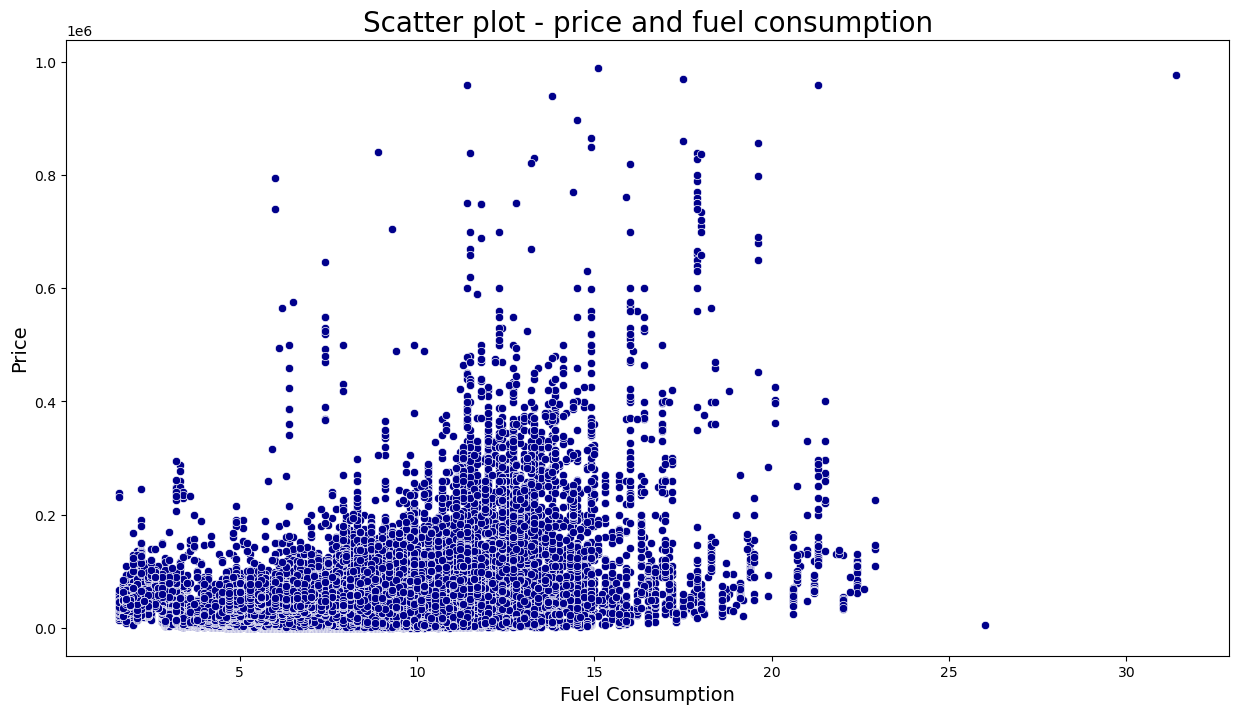

In [103]:
#Scatter plot between price and consumption

fig=plt.figure(figsize=(15,8))
sns.scatterplot(data=df.loc[df['price_in_euro']<1000000], x='fuel_consumption_l_100km',y='price_in_euro', color='darkblue')
plt.title('Scatter plot - price and fuel consumption', fontsize=20)
plt.xlabel('Fuel Consumption', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show();
              

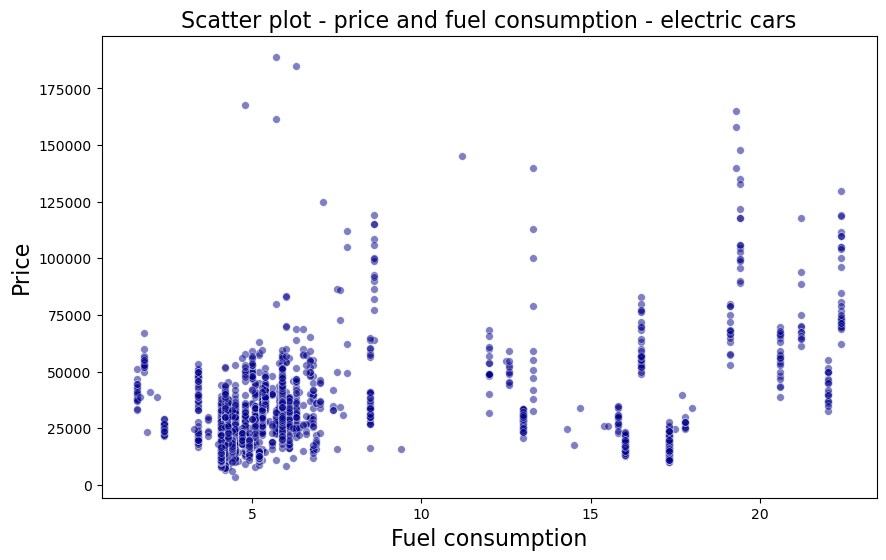

In [113]:
#Electric autos fuel consumtion
electric=df.loc[df['fuel_type']=='Electric']

#Scatter plot between price and consumption for electric cars

fig=plt.figure(figsize=(10,6))
sns.scatterplot(data=electric, x='fuel_consumption_l_100km',y='price_in_euro', color='darkblue', alpha=0.5, s=30)
plt.title('Scatter plot - price and fuel consumption - electric cars', fontsize=16)
plt.xlabel('Fuel consumption', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show();
             

### Interestingly, I do not see that lower fuel_consumtion is associated to high price, rather opposite thing - it could be due to correlation of fuel consumtion and ps.

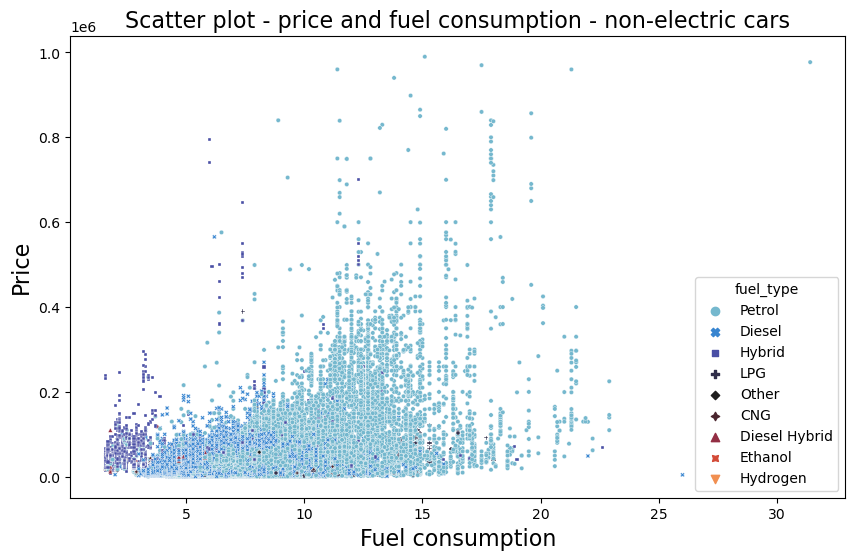

In [110]:
#Electric autos fuel consumtion
non_electric=df.loc[df['fuel_type']!='Electric']

#Scatter plot between price and consumption for electric cars

fig=plt.figure(figsize=(10,6))
sns.scatterplot(data=non_electric.loc[non_electric['price_in_euro']<1000000],s=10, x='fuel_consumption_l_100km',y='price_in_euro', hue='fuel_type',style='fuel_type', palette='icefire')
plt.title('Scatter plot - price and fuel consumption - non-electric cars', fontsize=16)
plt.xlabel('Fuel consumption', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show();

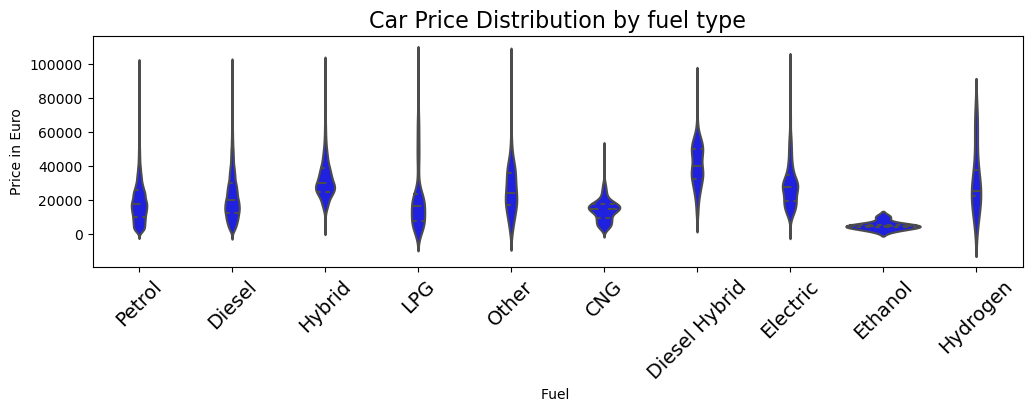

In [118]:
df_red=df.loc[df['price_in_euro']<100000]
plt.figure(figsize=(12,3))
sns.violinplot(x='fuel_type', y='price_in_euro', data=df_red, inner='quartile', color='blue')
plt.title("Car Price Distribution by fuel type", fontsize=16)
plt.xlabel("Fuel ", fontsize=10)
plt.ylabel("Price in Euro", fontsize=10)

plt.xticks(rotation=45, fontsize=14)  # Rotate x labels for better readability
plt.show()

In [122]:
electric['brand'].value_counts()

brand
renault          629
hyundai          373
smart            362
opel             278
fiat             209
kia              209
volkswagen       204
peugeot          130
mini             126
citroen          118
bmw              113
jaguar            92
audi              71
toyota            36
skoda             34
ford              31
honda             26
volvo             25
mercedes-benz     22
seat              22
nissan            20
jeep              18
dacia             18
ssangyong          7
mitsubishi         1
mazda              1
porsche            1
Name: count, dtype: int64

## Important to note,that in this dataset of used cars the electric cars are present rich, renaults is higher than VW (probably to the eraly models Zoe), there are no Teslam it is not much hyunday. It is very different that one can see on the streets, but this is a used car market, probably this year, it is already not like 2023, and next year as well, we will see more trends.

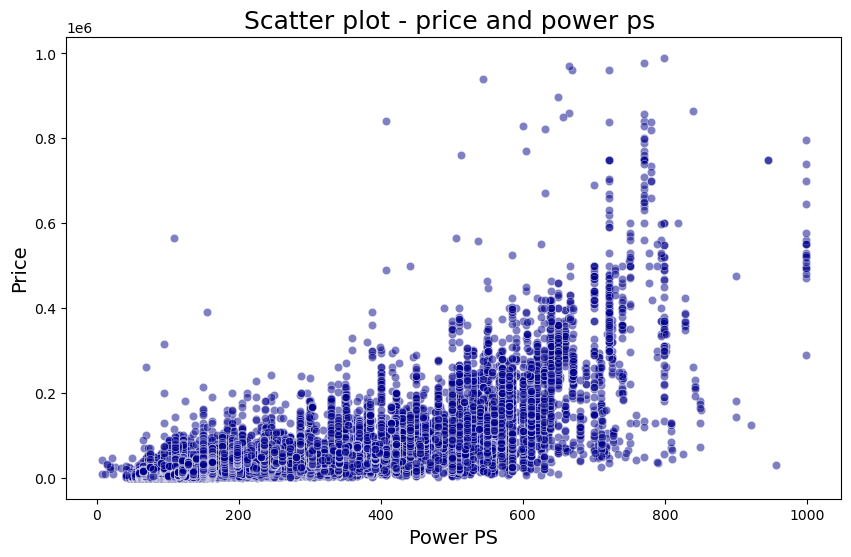

In [122]:


#Scatter plot between price and consumption for electric cars

fig=plt.figure(figsize=(10,6))
sns.scatterplot(data=df.loc[df['price_in_euro']<1000000], x='power_ps',y='price_in_euro', color='darkblue', alpha=0.5)
plt.title('Scatter plot - price and power ps ', fontsize=18)
plt.xlabel('Power PS', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show();
             

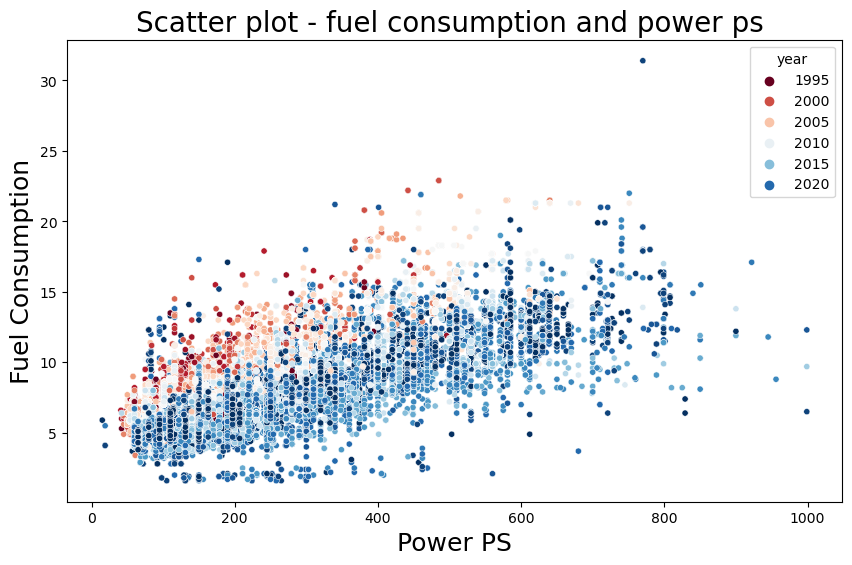

In [125]:


#Scatter plot between price and consumption for electric cars

fig=plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.loc[df['fuel_type']=='Petrol'], x='power_ps',y='fuel_consumption_l_100km', hue='year', s=20, palette='RdBu')
plt.title('Scatter plot - fuel consumption and power ps ', fontsize=20)
plt.xlabel('Power PS', fontsize=18)
plt.ylabel('Fuel Consumption', fontsize=18)
plt.show();
             

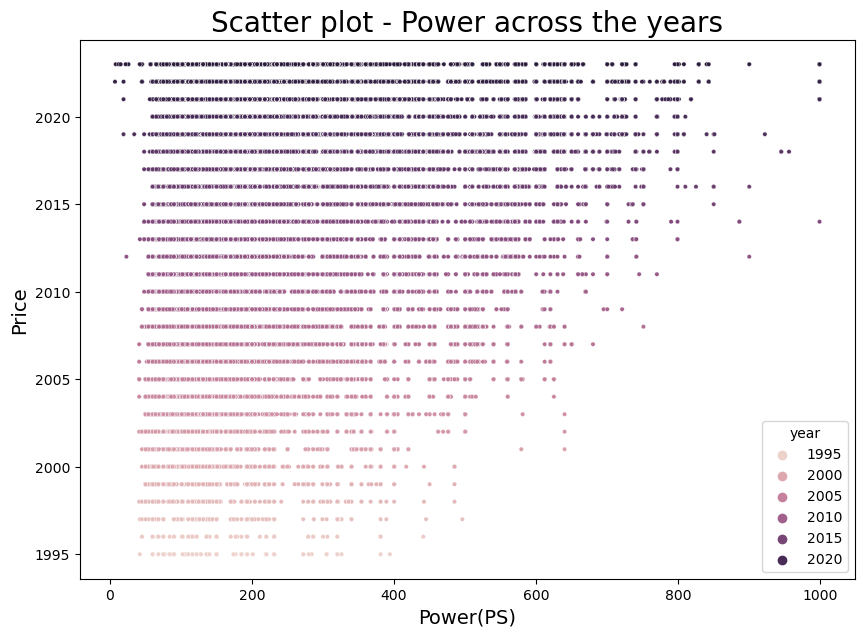

In [131]:
### Scatter plot for power_ps across the years

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='power_ps',y='year', color='darkblue', hue='year', s=10)
plt.title('Scatter plot - Power across the years', fontsize=20)
plt.xlabel('Power(PS)', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show();
              

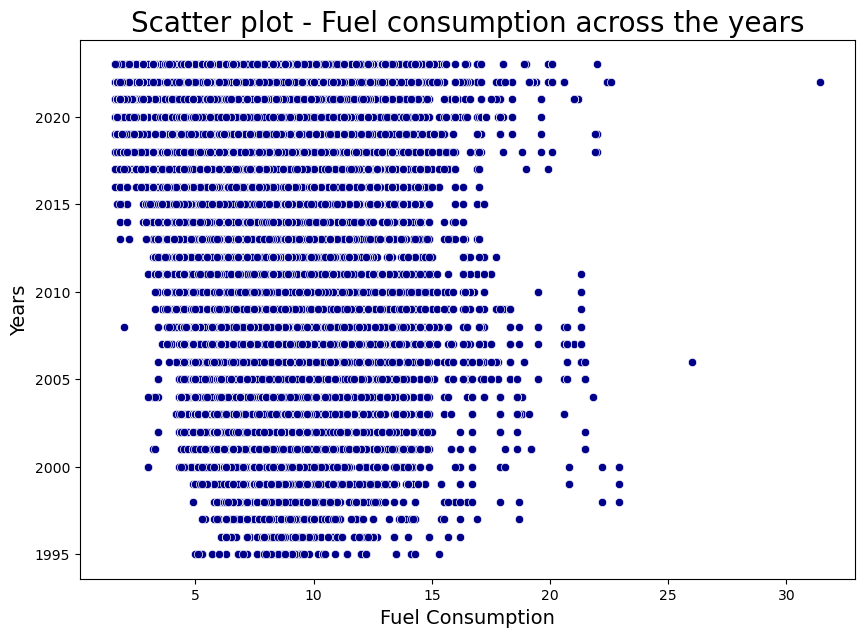

In [133]:
### Scatter plot between fuel_consumption

fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='fuel_consumption_l_100km',y='year', color='darkblue')
plt.title('Scatter plot - Fuel consumption across the years', fontsize=20)
plt.xlabel('Fuel Consumption', fontsize=14)
plt.ylabel('Years', fontsize=14)

plt.show();

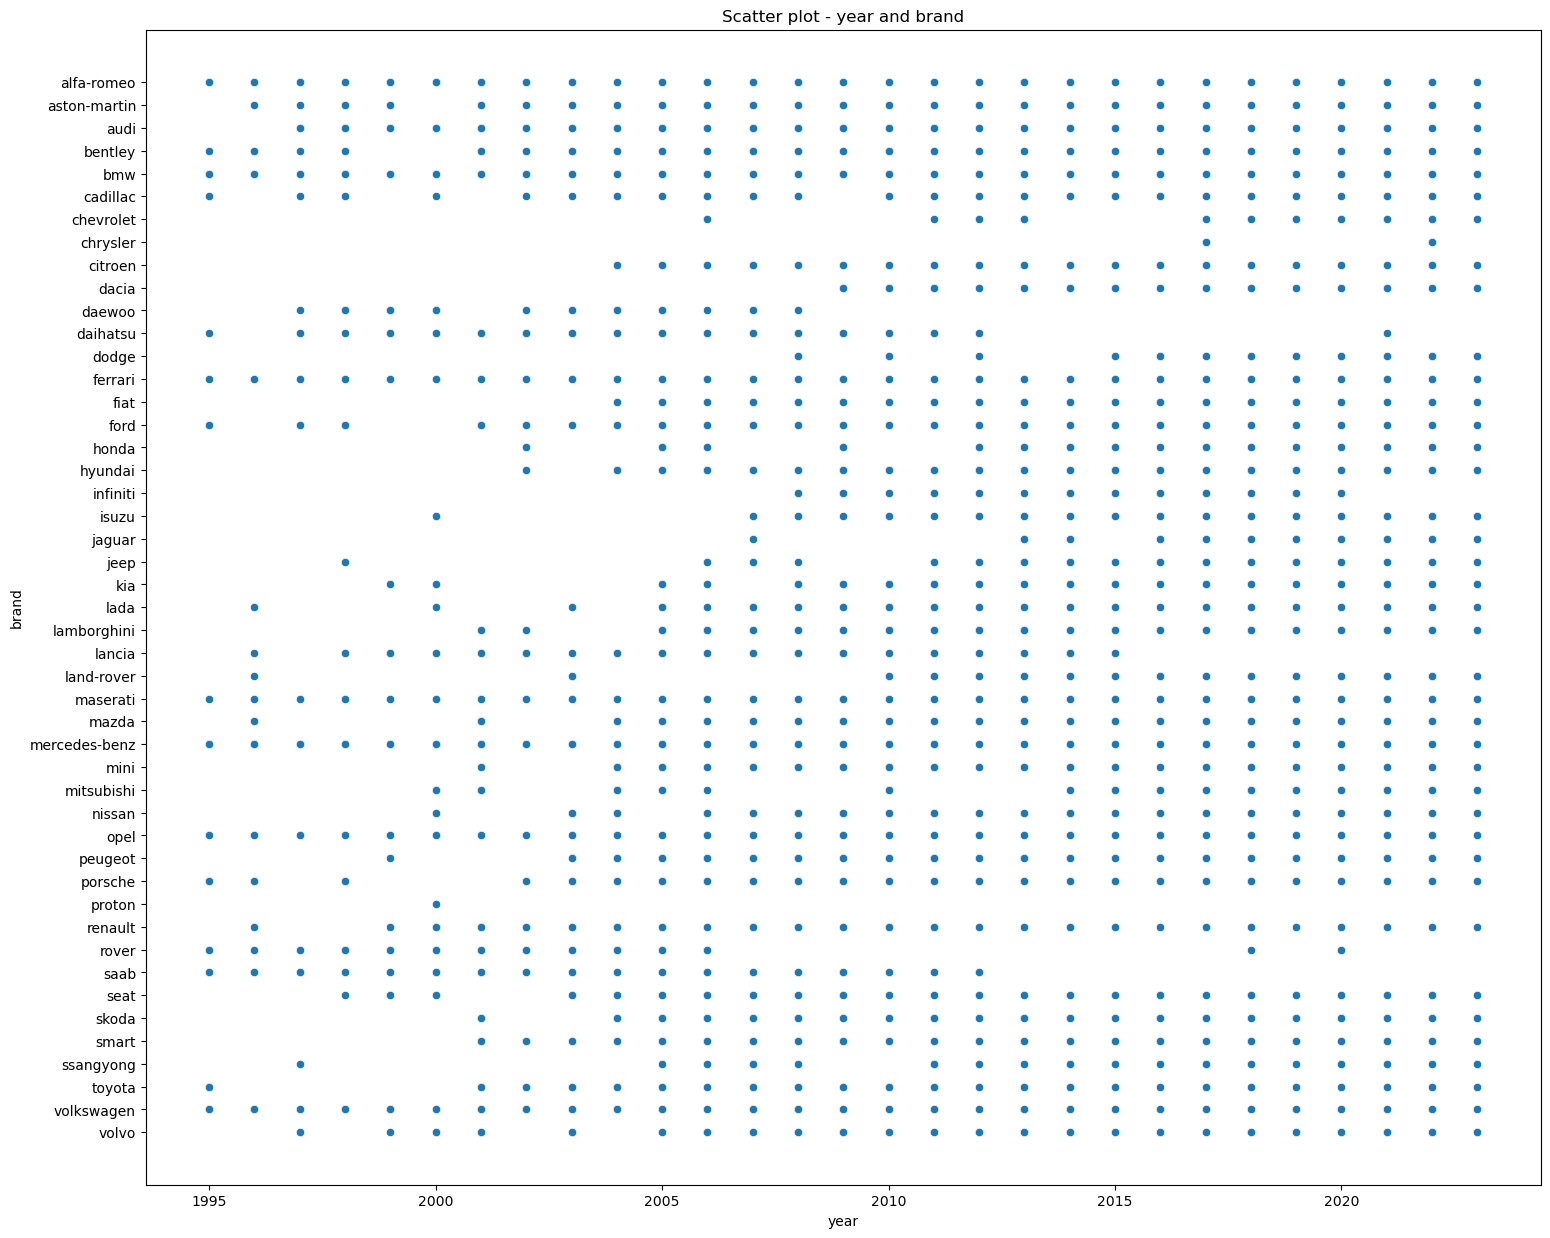

In [56]:
#Scatter plot between year and brand

fig=plt.figure(figsize=(18,15))
sns.scatterplot(data=df, x='year',y='brand')
plt.title('Scatter plot - year and brand')
plt.show();
            

## We see, some brand are dissapeared from the market - daihatsu, saab, maybe rover, daewoo. Some brands have appeared relatively recently - isuzu, dacia, citroen.

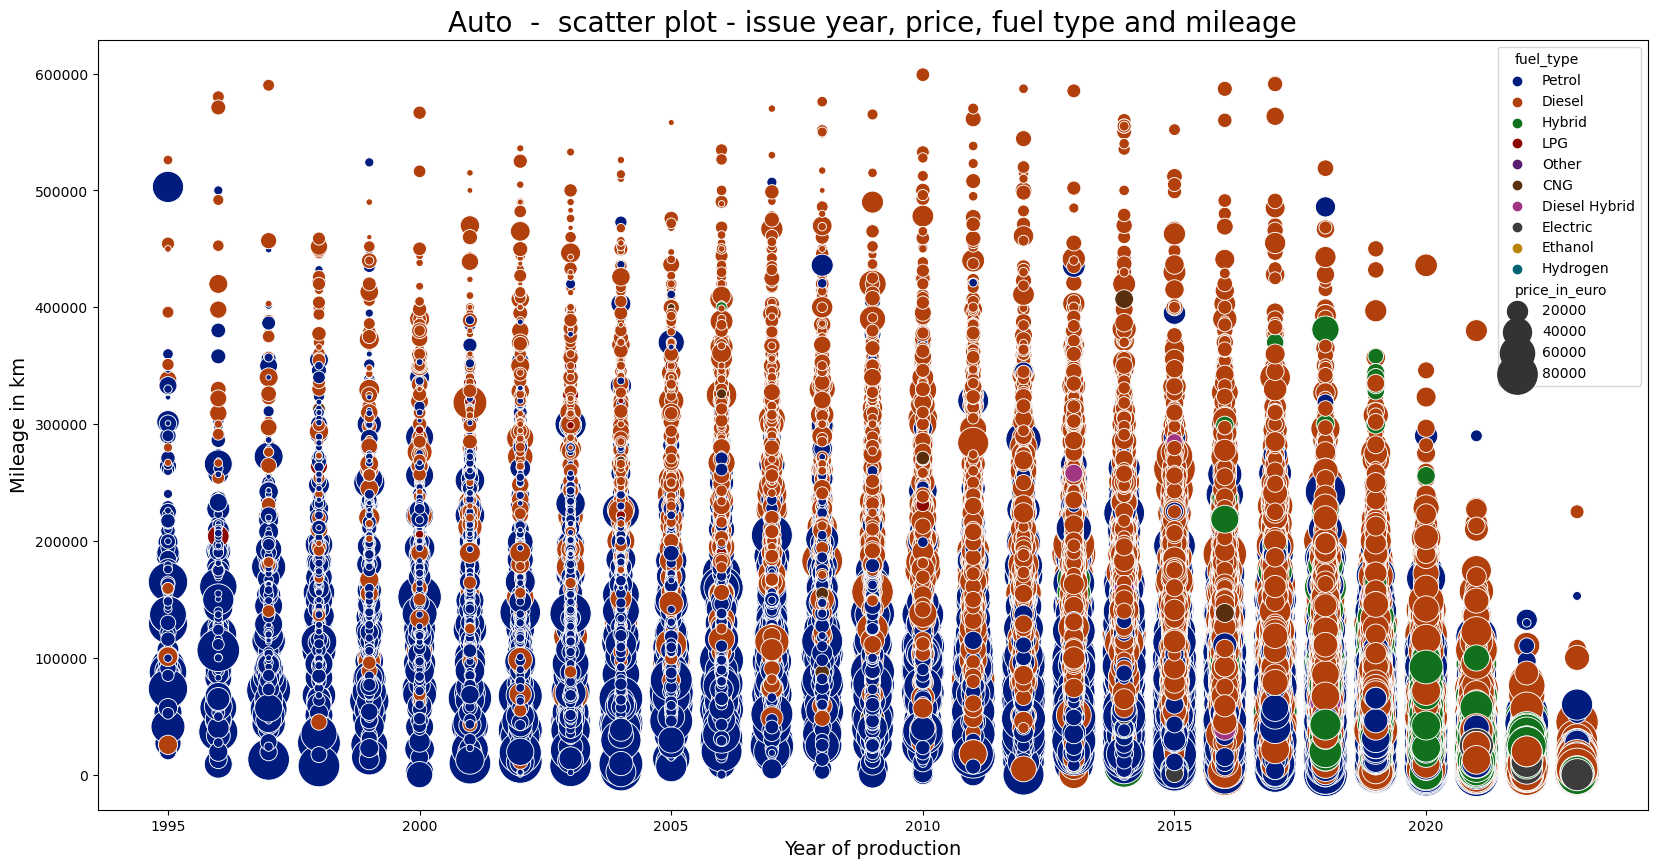

In [36]:
#fuel, km , price
df_red=df.loc[(df['price_in_euro']<100000) & (df['mileage_in_km']<600000)]
fig=plt.figure(figsize=(20,10))
sns.scatterplot(x=df_red.year, y=df_red.mileage_in_km, hue=df_red.fuel_type, size=df_red.price_in_euro, sizes=(10, 1000), palette='dark')
plt.title('Auto  -  scatter plot - issue year, price, fuel type and mileage', fontsize=20)

plt.xlabel('Year of production', fontsize=14)
plt.ylabel('Mileage in km', fontsize=14)

#Scatter plot between price and year

plt.show();

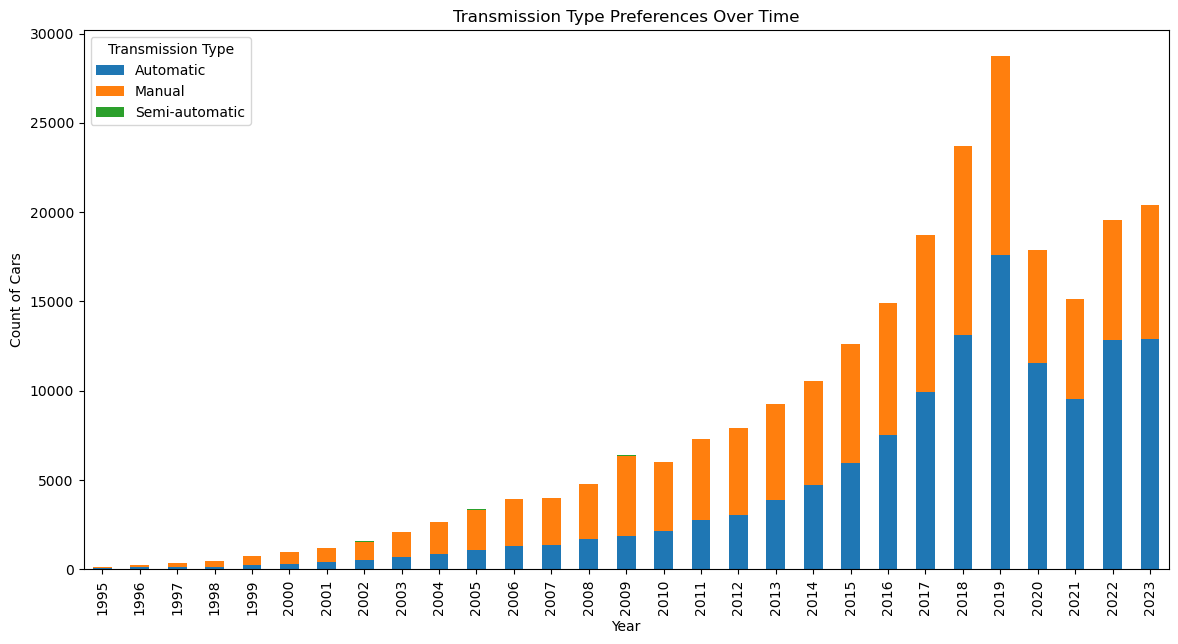

In [40]:


#Group the data
transmission_data = df.groupby(['year', 'transmission_type']).size().unstack().fillna(0)

# Create stacked bar plot using matplotlib
transmission_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Transmission Type Preferences Over Time")
plt.ylabel("Count of Cars")
plt.xlabel("Year")
plt.legend(title="Transmission Type")
plt.show()

In [56]:
# Calculate the proportion of each transmission type per year
transmission_percentages = df.groupby(['year', 'transmission_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()

transmission_percentages.head()

transmission_type  Automatic     Manual  Semi-automatic
year year                                              
1995 1995          44.295302  55.704698             NaN
1996 1996          44.090909  55.454545        0.454545
1997 1997          34.461538  65.538462             NaN
1998 1998          31.509847  68.271335        0.218818
1999 1999          31.600547  68.125855        0.273598

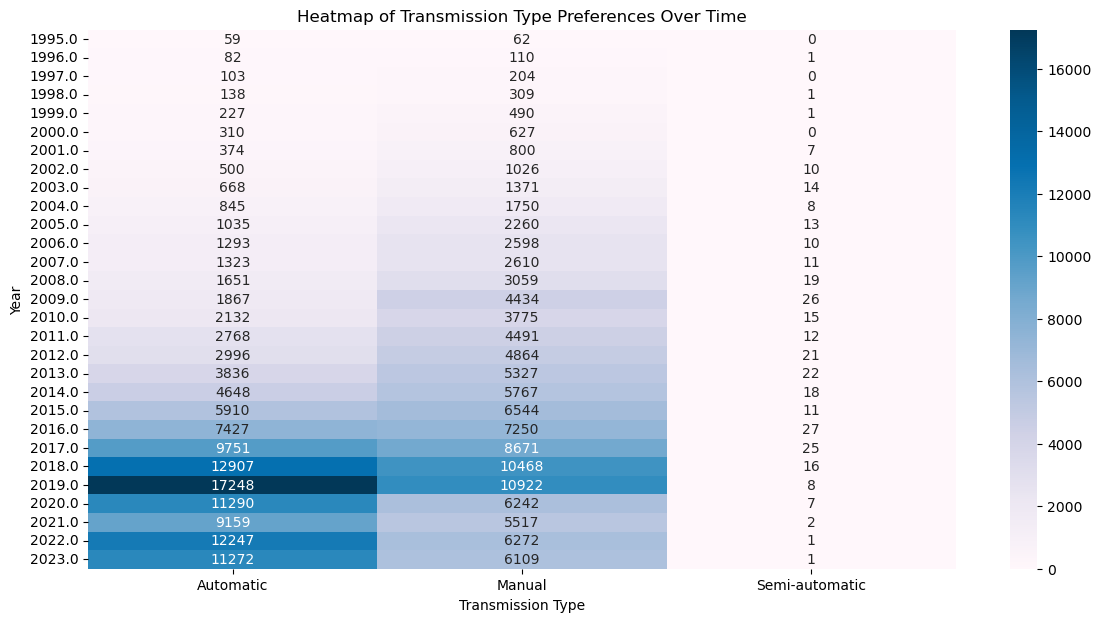

In [28]:
# Pivot the data for heatmap
heatmap_data = df.groupby(['year', 'transmission_type']).size().unstack().fillna(0)

# Create heatmap using seaborn
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="PuBu", annot=True, fmt='g')
plt.title("Heatmap of Transmission Type Preferences Over Time")
plt.ylabel("Year")
plt.xlabel("Transmission Type")
plt.show()

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

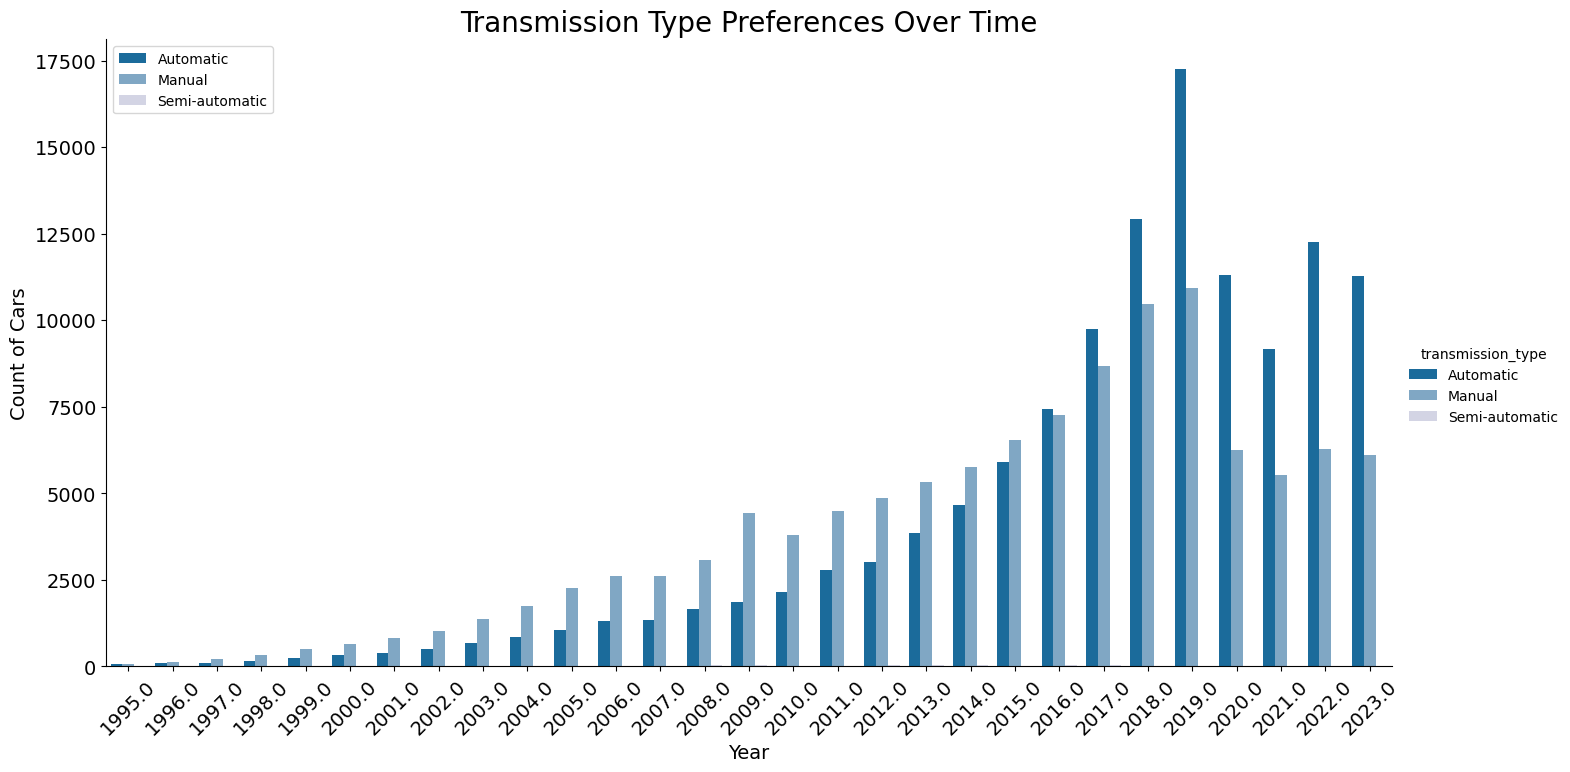

In [141]:
# Example: Group data
transmission_data = df.groupby(['year', 'transmission_type']).size().reset_index(name='count')

# Create a grouped bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.catplot(x='year', y='count', hue='transmission_type', kind='bar', data=transmission_data, height=7, aspect=2, palette='PuBu_r')
plt.title("Transmission Type Preferences Over Time", fontsize = 20)
plt.ylabel("Count of Cars", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left')
plt.show();

In [88]:
# Step 1: Group by 'year' and 'transmission_type' and count occurrences
transmission_counts = df.groupby(['year', 'transmission_type']).size().unstack(fill_value=0)

## Step 2: Calculate the percentage of each transmission type per year
transmission_percentages = transmission_counts.apply(lambda x: 100 * x / x.sum(), axis=1)

# Display the result
print(transmission_percentages)

transmission_type  Automatic     Manual  Semi-automatic
year                                                   
1995               44.295302  55.704698        0.000000
1996               44.090909  55.454545        0.454545
1997               34.461538  65.538462        0.000000
1998               31.509847  68.271335        0.218818
1999               31.600547  68.125855        0.273598
2000               33.193277  66.806723        0.000000
2001               31.927213  67.411084        0.661704
2002               32.689833  66.666667        0.643501
2003               32.548077  66.778846        0.673077
2004               32.509506  67.186312        0.304183
2005               31.382502  68.229322        0.388176
2006               33.197452  66.547771        0.254777
2007               33.484049  66.239638        0.276312
2008               34.827946  64.754953        0.417101
2009               29.463445  70.128648        0.407907
2010               36.000000  63.733333        0

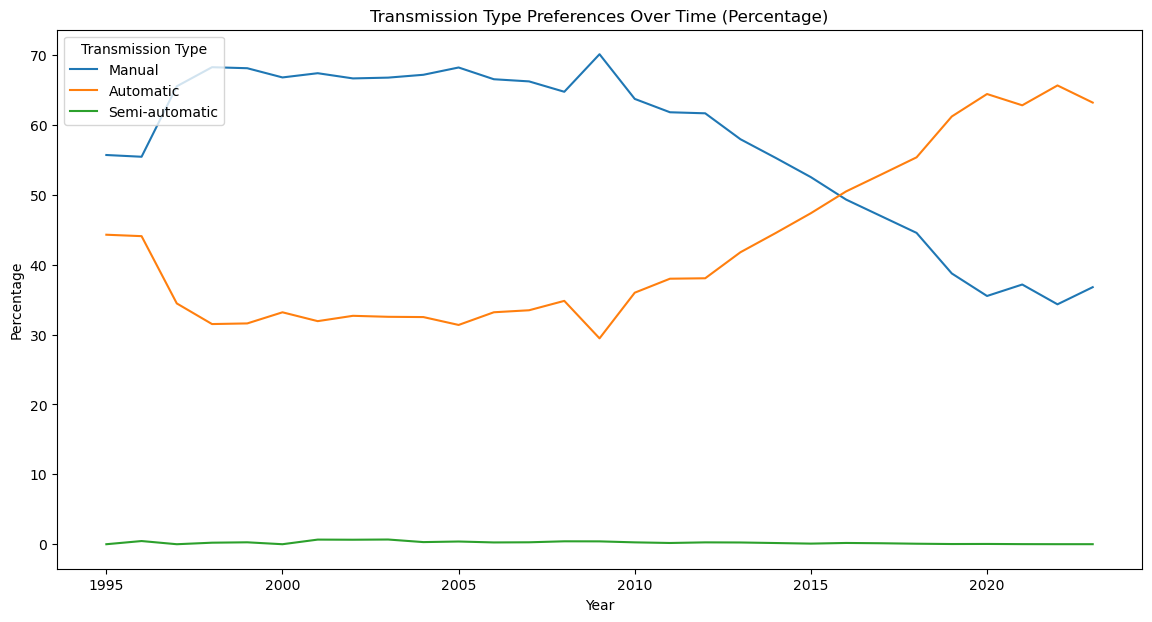

In [89]:
# Step 1: Reset the index to make 'year' a column for plotting
transmission_percentages = transmission_percentages.reset_index()

# Step 2: Create a line plot for each transmission type
plt.figure(figsize=(14, 7))

# Plot 'Manual' line
sns.lineplot(x='year', y='Manual', data=transmission_percentages, label='Manual')

# Plot 'Automatic' line
sns.lineplot(x='year', y='Automatic', data=transmission_percentages, label='Automatic')

# Plot 'Semi-automatic' line (if it exists)
if 'Semi-automatic' in transmission_percentages.columns:
    sns.lineplot(x='year', y='Semi-automatic', data=transmission_percentages, label='Semi-automatic')

# Add labels and title
plt.title("Transmission Type Preferences Over Time (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Transmission Type")

# Show the plot
plt.show()

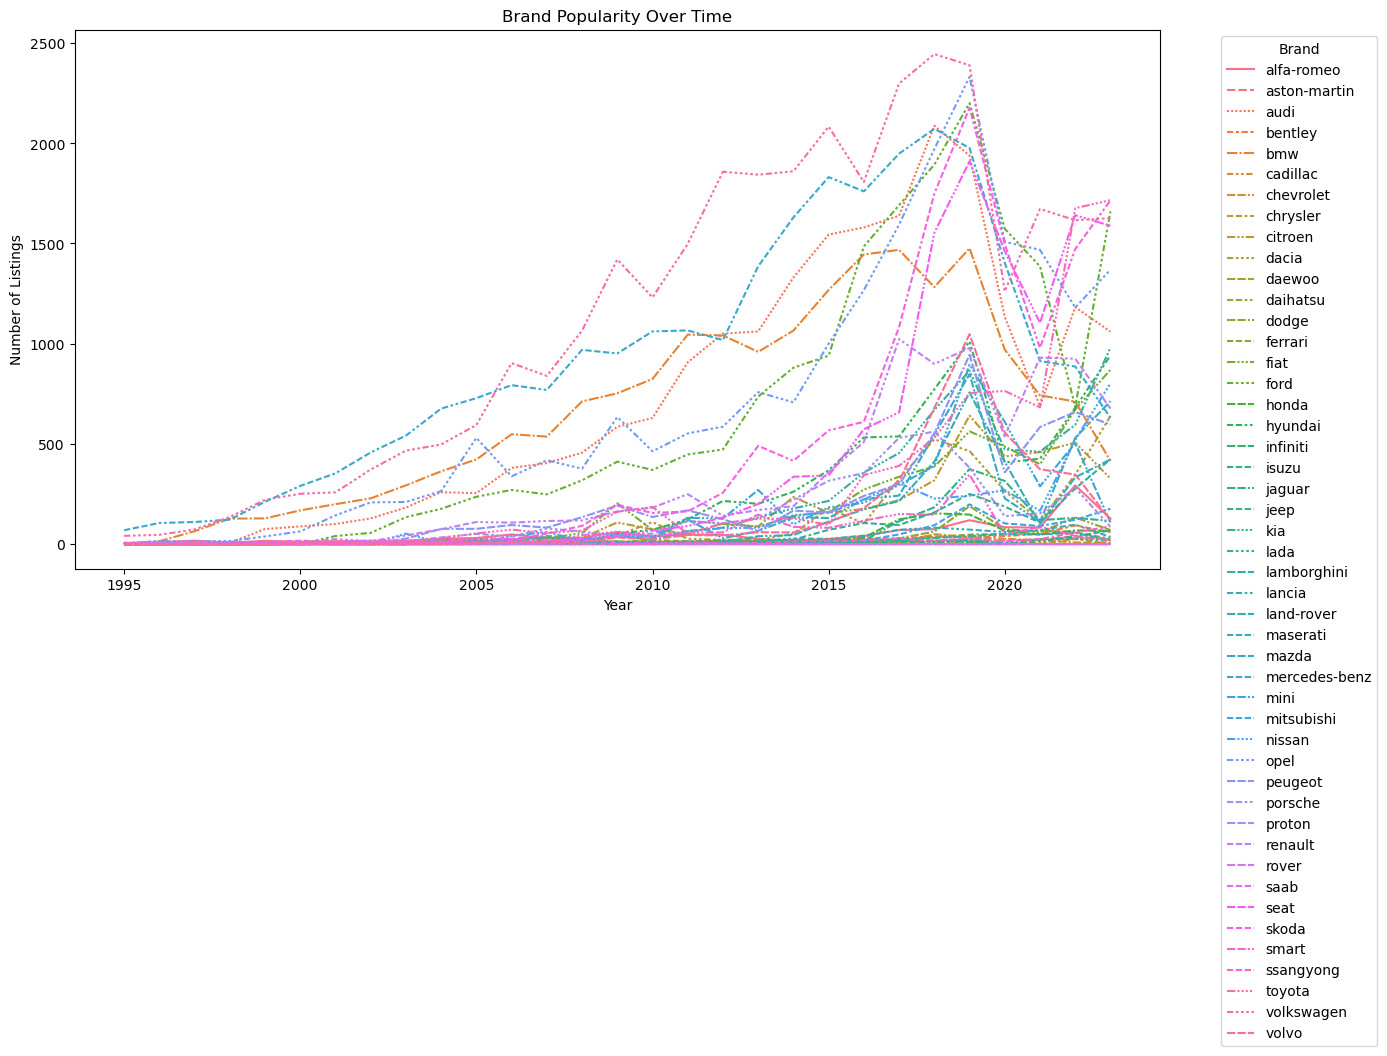

In [90]:
# Group by year and brand, then count listings
brand_trends = df.groupby(['year', 'brand']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=brand_trends)
plt.title('Brand Popularity Over Time')
plt.ylabel('Number of Listings')
plt.xlabel('Year')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

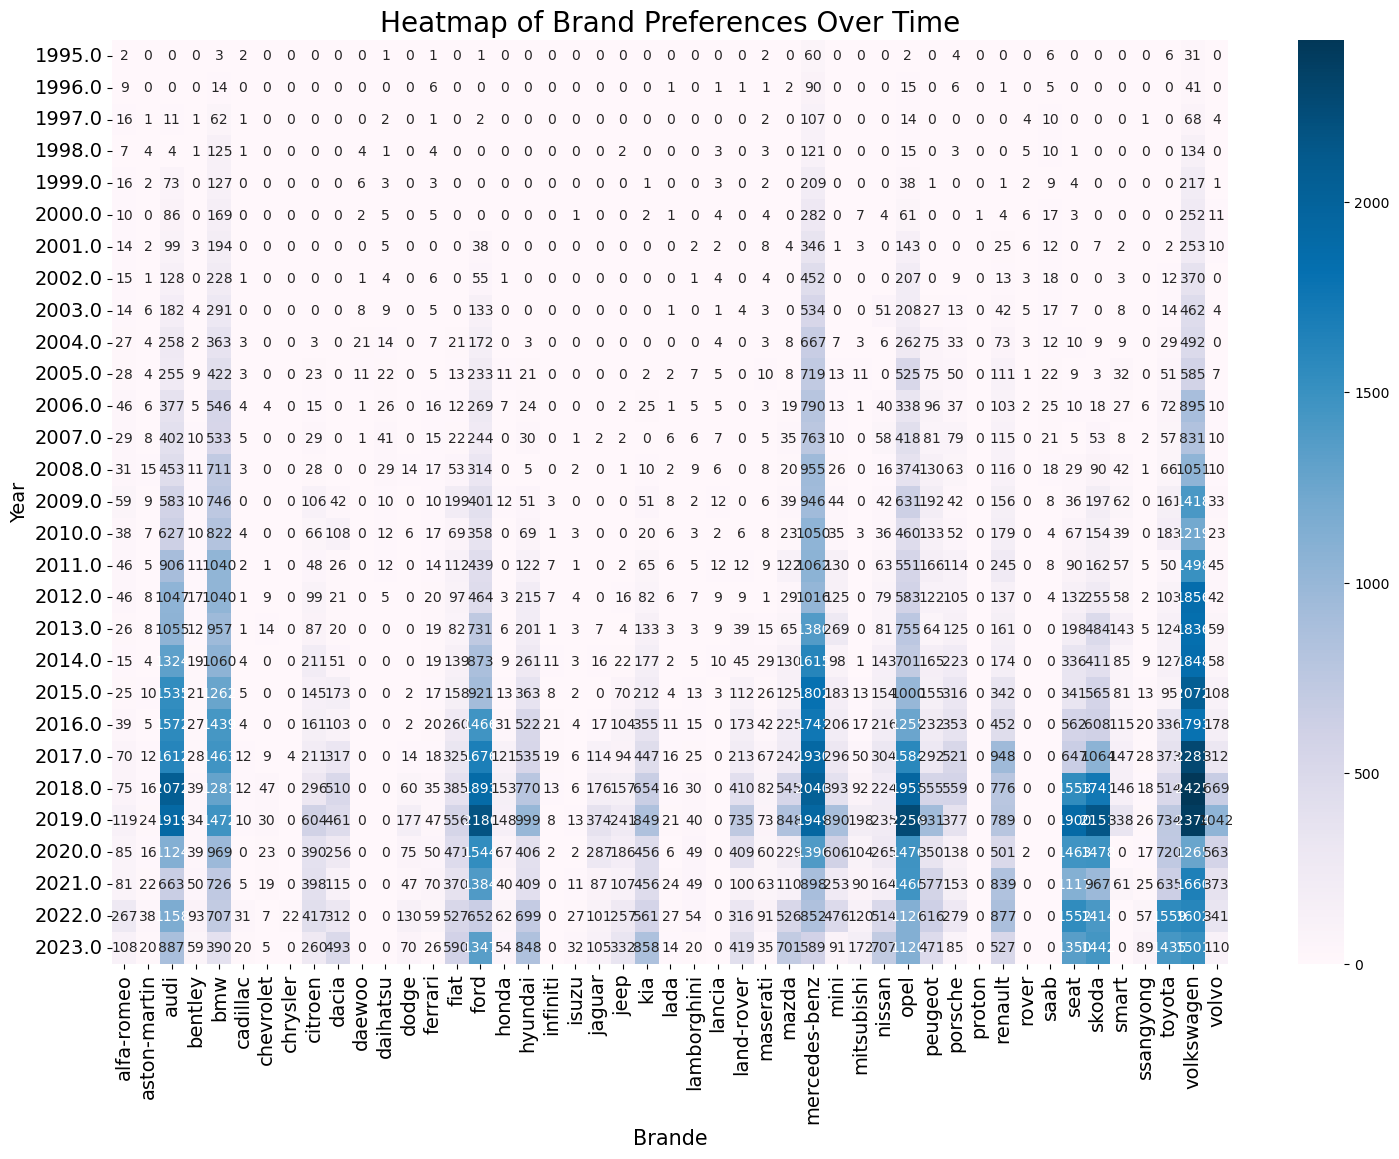

In [143]:
# Pivot the data for heatmap
heatmap_data = df.groupby(['year', 'brand']).size().unstack().fillna(0)

# Create heatmap using seaborn
plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_data, cmap="PuBu", annot=True, fmt='g')
plt.title("Heatmap of Brand Preferences Over Time", fontsize=20)
plt.ylabel("Year", fontsize=14)
plt.xlabel("Brande", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### In general , the plots reveal the decrease of presence of the cars produced 2020-2021 on the market

In [31]:
# Define the selected brands and years
selected_brands = ['bmw', 'mercedes-benz', 'audi', 'volkswagen', 'toyota', 'mazda', 'renault', 
                   'ford', 'peugeut', 'volvo', 'opel', 'kia', 'alfa-romeo','fiat',
                  'seat', 'skoda']  # Replace with your desired brands
selected_years = [2023]  # Replace with your desired years

# Filter the DataFrame
filtered_df = df[(df['brand'].isin(selected_brands)) & (df['year'].isin(selected_years))]

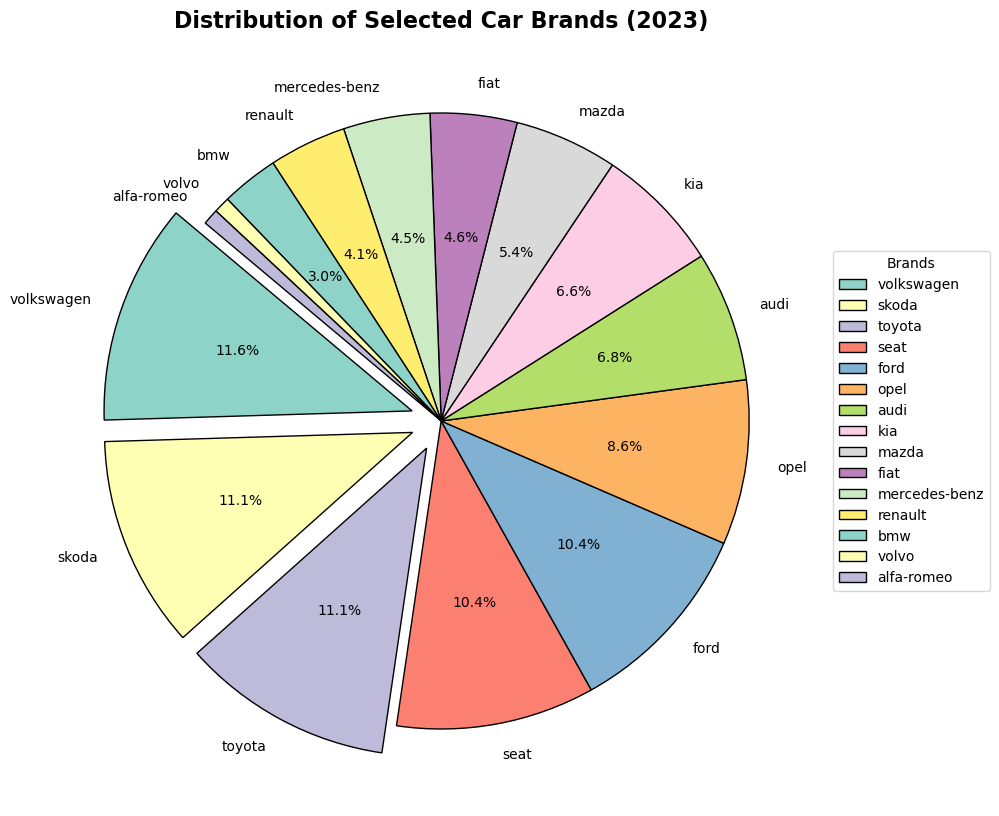

In [32]:
# Count occurrences of each brand within the filtered data
brand_counts = filtered_df['brand'].value_counts()



# Define a color palette for variety
colors = plt.cm.Paired(range(len(brand_counts)))
explode = [0.1 if i == brand_counts.idxmax() else 0 for i in range(len(brand_counts))]
colors = sns.color_palette("Set3", n_colors=len(brand_counts)) 

def autopct_format(pct):
    return '{:.1f}%'.format(pct) if pct >= 2 else ''

explode = [0.1 if i < 3 else 0 for i in range(len(brand_counts))]


plt.figure(figsize=(10, 10))
plt.pie(
    brand_counts, 
    labels=brand_counts.index, 
    autopct=autopct_format,        # Show percentages
    startangle=140,           # Start angle for rotation
    colors=colors,            # Use a color map for diversity
    wedgeprops={'edgecolor': 'black'},# Add edge color for definition
    explode = explode
    
    
)
plt.legend(brand_counts.index, title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


# Add a title with a larger font size for emphasis
plt.title("Distribution of Selected Car Brands (2023)", fontsize=16, fontweight='bold')
plt.show()

In [78]:
import ipywidgets as widgets
from IPython.display import display

# Simple widget test
dropdown = widgets.Dropdown(
    options=['Option 1', 'Option 2', 'Option 3'],
    description='Select:',
    value='Option 1'
)

def on_change(change):
    print(f'Selected: {change["new"]}')

dropdown.observe(on_change, names='value')
display(dropdown)

Dropdown(description='Select:', options=('Option 1', 'Option 2', 'Option 3'), value='Option 1')

Selected: Option 2
Selected: Option 3


In [144]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your existing DataFrame with 'year' and 'brand' columns.
# Replace this with your actual DataFrame.
# df = pd.read_csv('your_data_file.csv')

# Define the selected brands
selected_brands = ['bmw', 'mercedes-benz', 'audi', 'volkswagen', 'toyota', 'mazda', 
                   'renault', 'ford', 'peugeot', 'volvo', 'opel', 'kia', 
                   'alfa-romeo', 'fiat', 'seat', 'skoda']


# Define years for the dropdown selection
#years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]  # Get unique years from filtered DataFrame

# Define the selected brands


# Filter the dataset for selected brands
filtered_df = df[df['brand'].isin(selected_brands)]

# Define years for the dropdown selection
years = sorted(filtered_df['year'].unique())  # Get unique years from filtered DataFrame

# Define a dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=years,
    description='Year',
    value=years[0]  # Default to the first year available
)

# Function to update the pie chart based on the selected year
def update_pie_chart(selected_year):
    plt.clf()  # Clear the previous plot
    # Filter data based on the selected year
    filtered_data = filtered_df[filtered_df['year'] == selected_year]
    
    # Debug output to see the filtered data
    #print(f"Filtered data for year {selected_year}:\n", filtered_data)

    # Get value counts for each brand in the filtered data
    brand_counts = filtered_data['brand'].value_counts()

    plt.figure(figsize=(10, 10))
    
    if brand_counts.empty:
        plt.text(0.5, 0.5, f"No data available for selected year: {selected_year}", 
                 horizontalalignment='center', verticalalignment='center', fontsize=16)
        plt.axis('off')
    else:
        colors = plt.cm.Paired(range(len(brand_counts)))
        explode = [0.1 if i < 3 else 0 for i in range(len(brand_counts))]
        # Define a custom function for displaying percentages 
        def autopct_func(pct):
            return '{:.1f}%'.format(pct) if pct >= 2 else ''   
        
        plt.pie(
            brand_counts,
            labels=brand_counts.index,
            autopct=autopct_func,
            startangle=140,
            colors=colors,
            wedgeprops={'edgecolor': 'black'},
            explode=explode,
            textprops={'fontsize': 14},
            pctdistance=0.85
        )
        plt.legend(brand_counts.index, title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.title(f"Distribution of Selected Car Brands ({selected_year})", fontsize=16, fontweight='bold')
    
    plt.show()

# Set up the interactive widget
interactive_widget = widgets.interactive(update_pie_chart, selected_year=year_dropdown)

# Display the dropdown and the interactive plot
display(interactive_widget)


interactive(children=(Dropdown(description='Year', options=(1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 20…

In [147]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your existing DataFrame with 'year' and 'brand' columns.
# Replace this with your actual DataFrame.
# df = pd.read_csv('your_data_file.csv')

# Define the selected brands
selected_brands = list(df['brand'].unique())

# Filter the dataset for selected brands
filtered_df = df[df['brand'].isin(selected_brands)]

# Define years for the dropdown selection
years = sorted(filtered_df['year'].unique())  # Get unique years from filtered DataFrame

# Define a dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=years,
    description='Year',
    value=years[0]  # Default to the first year available
)

# Function to update the pie chart based on the selected year
def update_pie_chart(selected_year):
    plt.clf()  # Clear the previous plot
    # Filter data based on the selected year
    filtered_data = filtered_df[filtered_df['year'] == selected_year]
    
    # Get value counts for each brand in the filtered data
    brand_counts = filtered_data['brand'].value_counts()
    total_count = brand_counts.sum()

    # Convert the series to a DataFrame and rename the column to 'count'
    brand_counts = brand_counts.to_frame(name='count')
    brand_counts['percentage'] = (brand_counts['count'] / total_count) * 100

    # Separate brands with >= 2% as main brands and others as "Other"
    main_brands = brand_counts[brand_counts['percentage'] >= 2]['count']
    other_brands = brand_counts[brand_counts['percentage'] < 2]['count']

    # Combine the counts of "Other" brands if there are any
    if not other_brands.empty:
        main_brands['others'] = other_brands.sum()

    colors = sns.color_palette("Set3", n_colors=len(selected_brands)) 
    # Create the pie chart with labels for main brands and "Other" combined
    plt.figure(figsize=(10, 10))
   # colors = plt.cm.Paired(range(len(main_brands)))
    explode = [0.1 if i < 3 else 0 for i in range(len(main_brands))]

    def autopct_func(pct):
        return '{:.1f}'.format(pct) if pct >= 2 else ''   

    plt.pie(
        main_brands,
        labels=main_brands.index,
        autopct=autopct_func,
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        explode=explode,
        textprops={'fontsize': 14},
        labeldistance=1.1,
        pctdistance=0.9,
        rotatelabels=True
    )
    
    plt.legend(main_brands.index, title="Brands", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1.5))
    plt.title(f"Distribution of Selected Car Brands ({selected_year})", fontsize=16, fontweight='bold', pad=30)
    plt.show()

# Set up the interactive widget
interactive_widget = widgets.interactive(update_pie_chart, selected_year=year_dropdown)

# Display the dropdown and the interactive plot
display(interactive_widget)

interactive(children=(Dropdown(description='Year', options=(1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 20…

In [94]:
# Function to create and save the pie chart
def save_pie_chart(selected_year):
    filtered_data = df[df['year'] == selected_year]
    brand_counts = filtered_data['brand'].value_counts().reset_index()
    brand_counts.columns = ['brand', 'count']

    # Create the pie chart
    fig = px.pie(brand_counts, values='count', names='brand', title=f'Distribution of Selected Car Brands ({selected_year})')
    fig.show()  # Show the chart in a browser

    # Save the figure to an HTML file
    fig.write_html(f"pie_chart_{selected_year}.html")

# Example usage
save_pie_chart(1995)  # Change the year as needed

In [61]:
# Group by model and calculate the total mileage for each model
mileage_by_model = df.groupby('model')['mileage_in_km'].max().sort_values(ascending=False)

# Get the top 20 models with the highest total mileage
top_20_models = mileage_by_model.head(20)

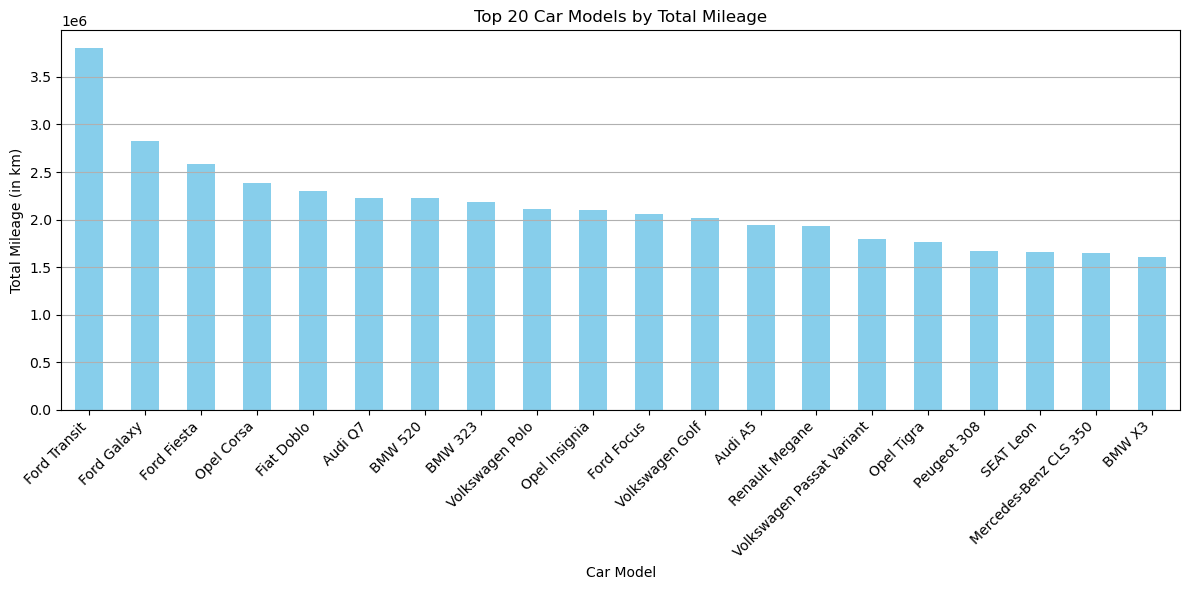

In [62]:
# Plotting
plt.figure(figsize=(12, 6))
top_20_models.plot(kind='bar', color='skyblue')
plt.title('Top 20 Car Models by Total Mileage')
plt.xlabel('Car Model')
plt.ylabel('Total Mileage (in km)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [33]:
# Group by model and calculate the total mileage for each model
mileage_by_brand = df.groupby('brand')['mileage_in_km'].max().sort_values(ascending=False)

# Get the top 20 models with the highest total mileage
top_20_brand = mileage_by_brand.head(20)

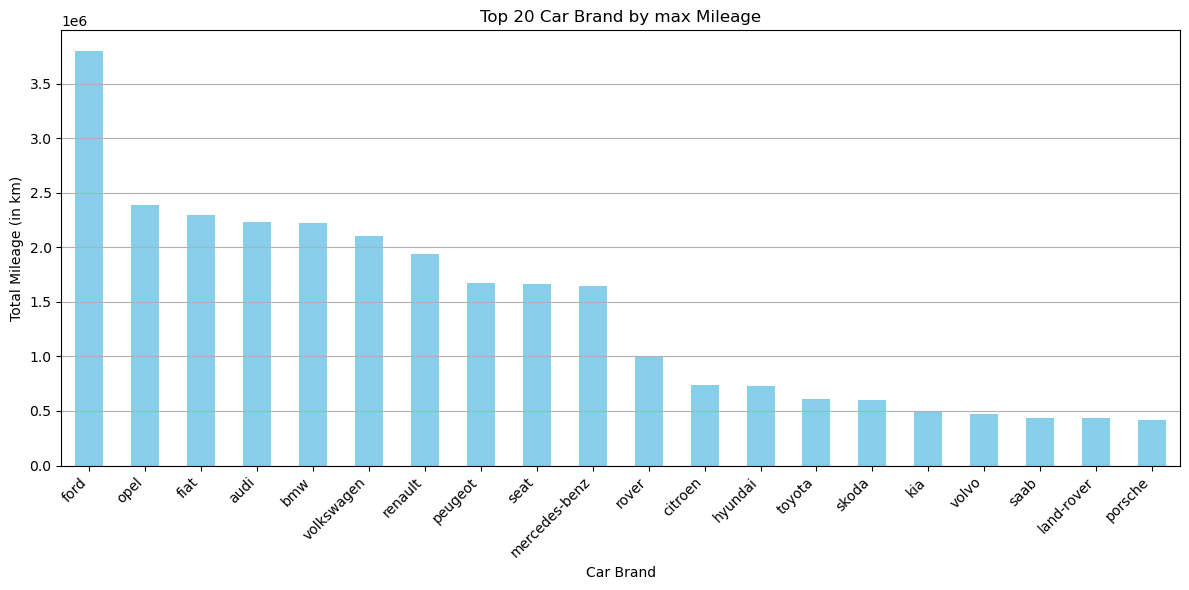

In [34]:
# Plotting
plt.figure(figsize=(12, 6))
top_20_brand.plot(kind='bar', color='skyblue')
plt.title('Top 20 Car Brand by max Mileage')
plt.xlabel('Car Brand')
plt.ylabel('Total Mileage (in km)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout
plt.show()

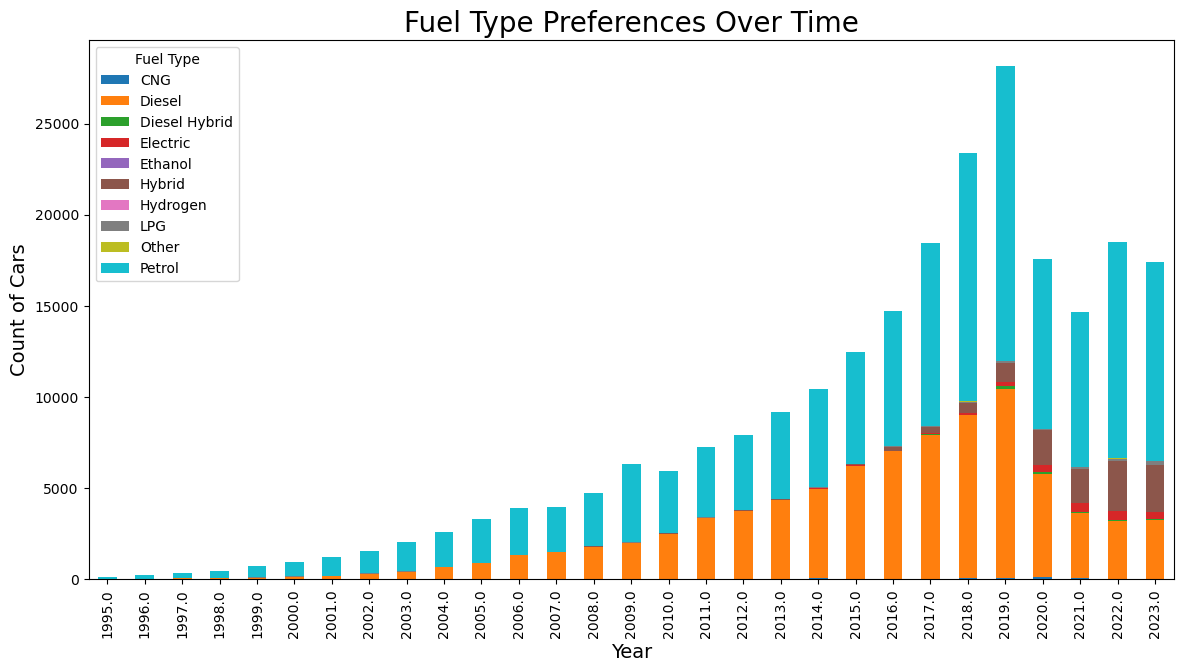

In [40]:

#Group the data
transmission_data = df.groupby(['year', 'fuel_type']).size().unstack().fillna(0)

# Create stacked bar plot using matplotlib
transmission_data.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Fuel Type Preferences Over Time", fontsize = 20)
plt.ylabel("Count of Cars", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.xticks(rotation=45, ha='right') 
plt.legend(title="Fuel Type")
plt.show()

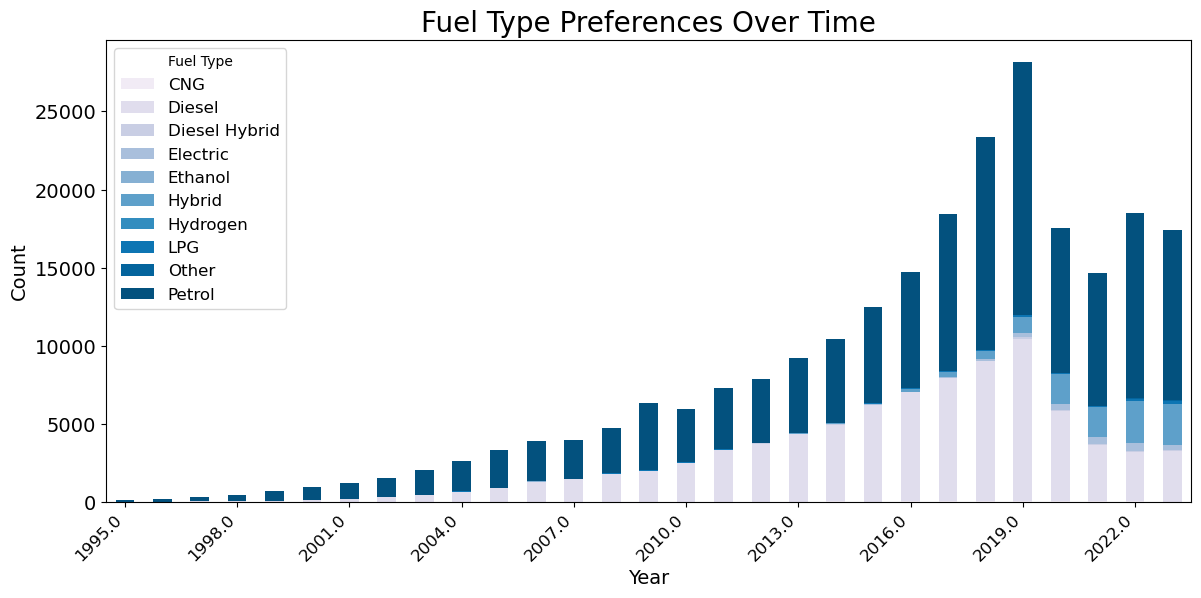

In [49]:
# Assuming df is your dataframe and transmission_data has already been created

# Define custom colors (e.g., using seaborn color palettes or specific hex values)
colors = sns.color_palette("PuBu", n_colors=len(transmission_data.columns))

# Create the stacked bar plot with custom colors
transmission_data.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

# Customize plot
plt.title("Fuel Type Preferences Over Time", fontsize=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Fuel Type", fontsize=12)

# Show plot
plt.show()

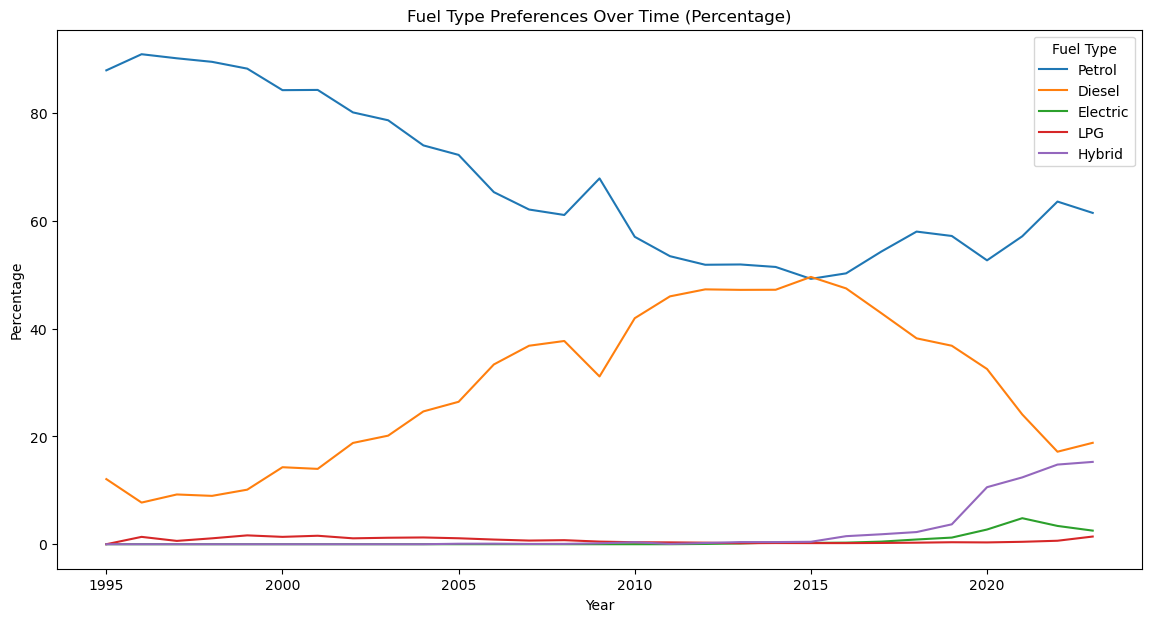

In [94]:
# Step 1: Group by 'year' and 'transmission_type' and count occurrences
fuel_counts = df.groupby(['year', 'fuel_type']).size().unstack(fill_value=0)

## Step 2: Calculate the percentage of each transmission type per year
fuel_percentages = fuel_counts.apply(lambda x: 100 * x / x.sum(), axis=1)



# Step 1: Reset the index to make 'year' a column for plotting
fuel_percentages = fuel_percentages.reset_index()

# Step 2: Create a line plot for each transmission type
plt.figure(figsize=(14, 7))

# Plot 'Manual' line
sns.lineplot(x='year', y='Petrol', data=fuel_percentages, label='Petrol')

# Plot 'Automatic' line
sns.lineplot(x='year', y='Diesel', data=fuel_percentages, label='Diesel')

# Plot 'Semi-automatic' line (if it exists)
if 'Electric' in fuel_percentages.columns:
    sns.lineplot(x='year', y='Electric', data=fuel_percentages, label='Electric')

# Plot 'Semi-automatic' line (if it exists)
if 'LPG' in fuel_percentages.columns:
    sns.lineplot(x='year', y='LPG', data=fuel_percentages, label='LPG') 
    
# Plot 'Semi-automatic' line (if it exists)
if 'Hybrid' in fuel_percentages.columns:
    sns.lineplot(x='year', y='Hybrid', data=fuel_percentages, label='Hybrid')     
    
# Add labels and title
plt.title("Fuel Type Preferences Over Time (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Fuel Type")

# Show the plot
plt.show()

### Offnote: There are no teslas in this Dataset, for some reasons. Used cars market has to catch up  the market of the new cars, but still, it is strange, that there are no any single tesla. To analyze the trend for electric cars without them is difficult.

## Price distribution:

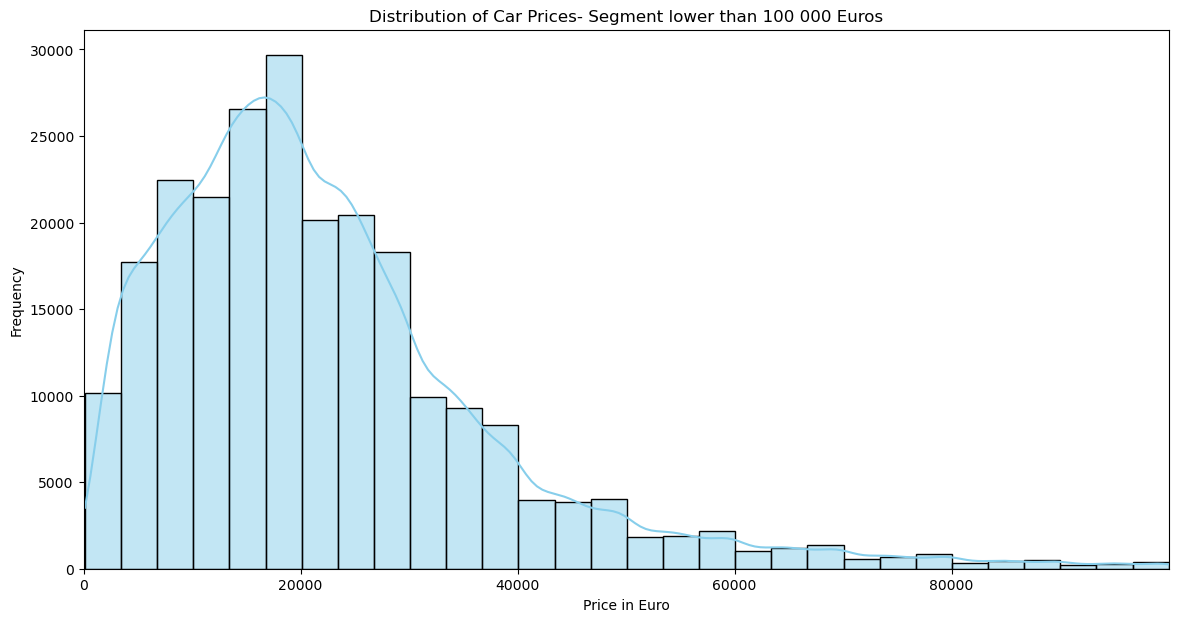

In [14]:
# Assuming df is your DataFrame containing car data
# For demonstration purposes, let's create a simple DataFrame

df_red=df.loc[df['price_in_euro']<100000]
plt.figure(figsize=(14, 7))
sns.histplot(df_red['price_in_euro'], bins=30, kde=True, color='skyblue')  # Add kde=True to show a kernel density estimate
plt.title("Distribution of Car Prices- Segment lower than 100 000 Euros")
plt.xlabel("Price in Euro")
plt.ylabel("Frequency")
plt.xlim(0, df_red['price_in_euro'].max())  # Set x limit to the maximum price for better visualization
plt.show()

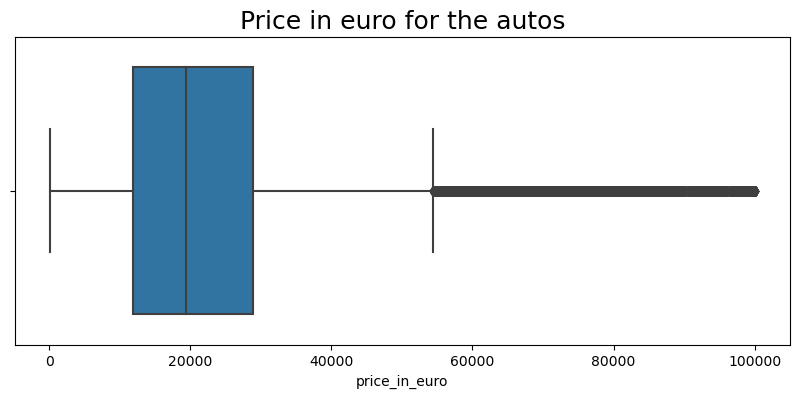

In [15]:
#Distribution of prices
fig=plt.figure(figsize=(10, 4))

sns.boxplot(x=df_red.price_in_euro)
plt.title('Price in euro for the autos', fontsize=18)
plt.show();

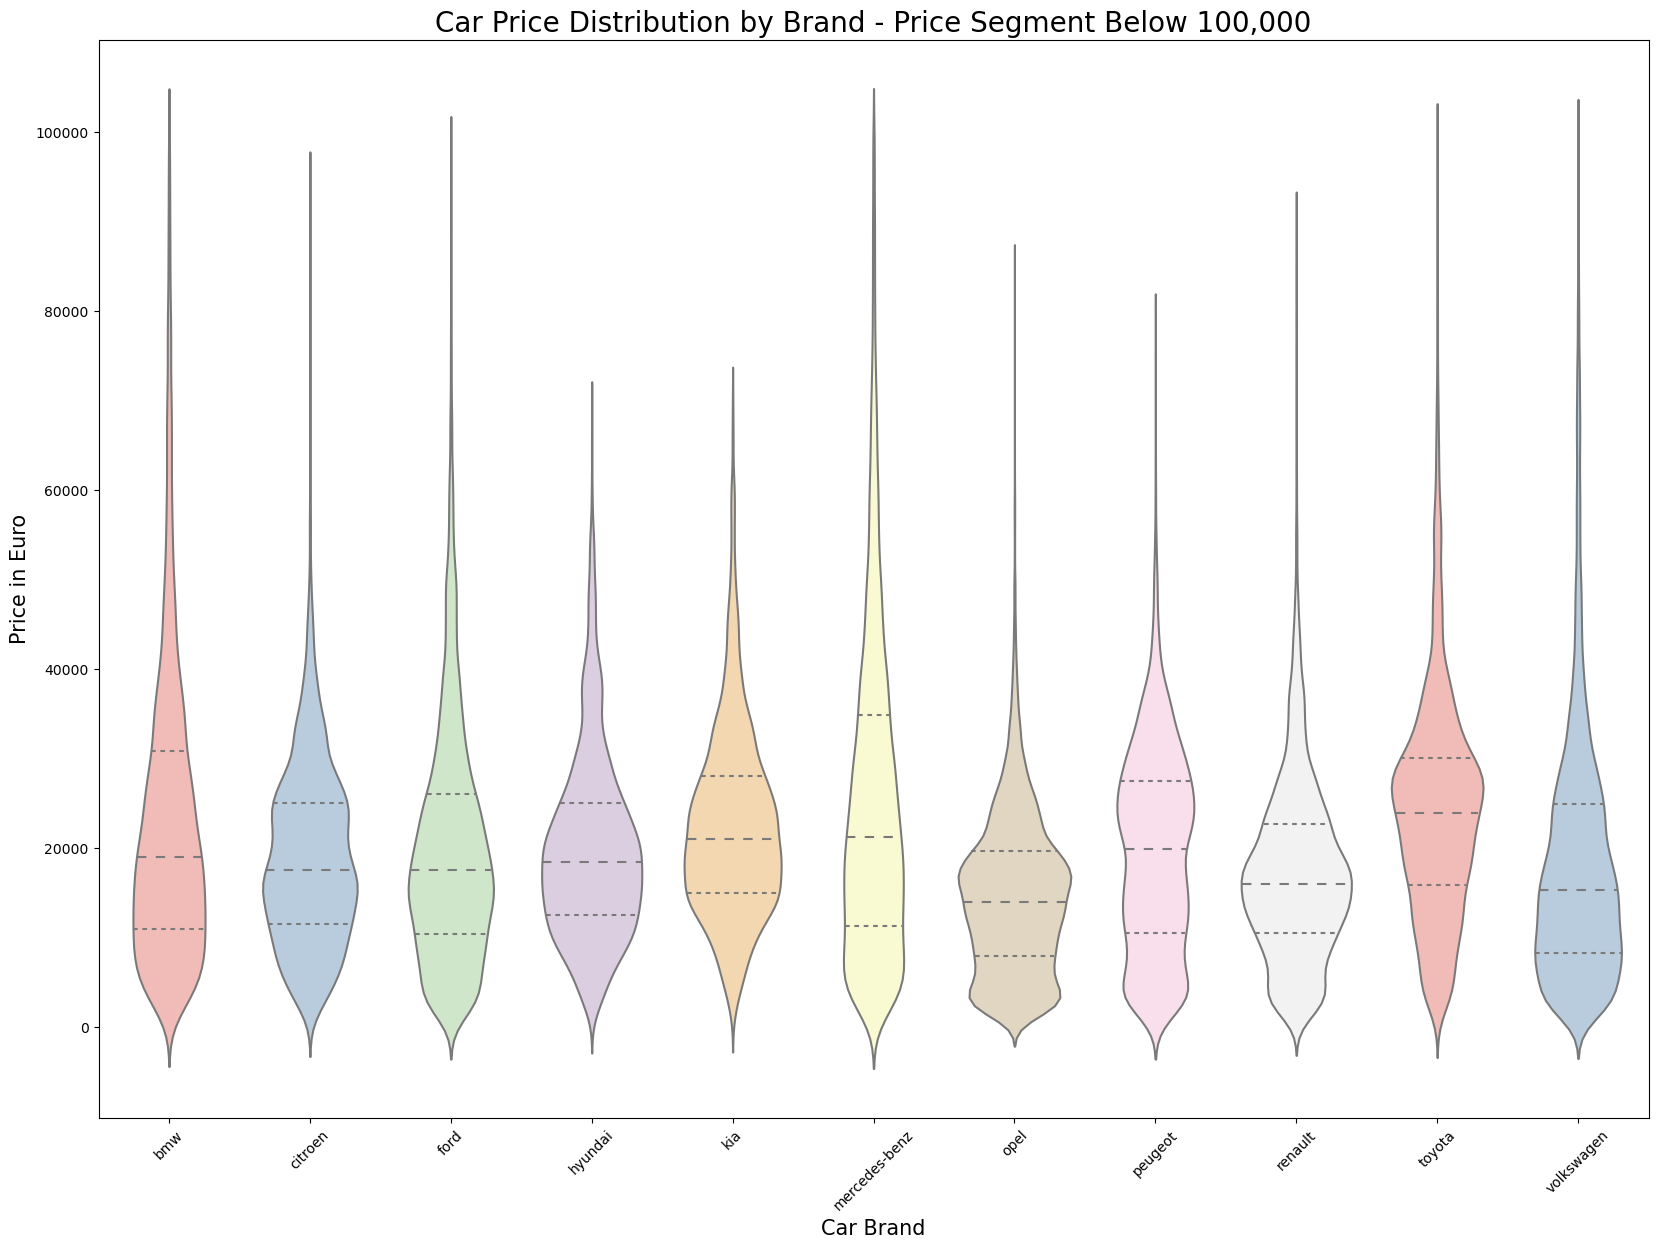

In [126]:


# Filter brands of interest
selected_brands = ['bmw', 'mercedes-benz', 'opel', 'volkswagen', 
                   'ford', 'citroen', 'peugeot', 'kia', 
                   'hyundai', 'toyota', 'renault']

# Filter the DataFrame for the selected brands and price below 100,000
df_filtered = df_red[df_red['brand'].isin(selected_brands) & (df_red['price_in_euro'] < 100000)]

# Set the size of the plot
plt.figure(figsize=(20, 14))

# Create the violin plot
sns.violinplot(x='brand', y='price_in_euro', data=df_filtered, inner='quartile', palette='Pastel1')

# Add titles and labels
plt.title("Car Price Distribution by Brand - Price Segment Below 100,000", fontsize=20)
plt.xlabel("Car Brand", fontsize=15)
plt.ylabel("Price in Euro", fontsize=15)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.show()


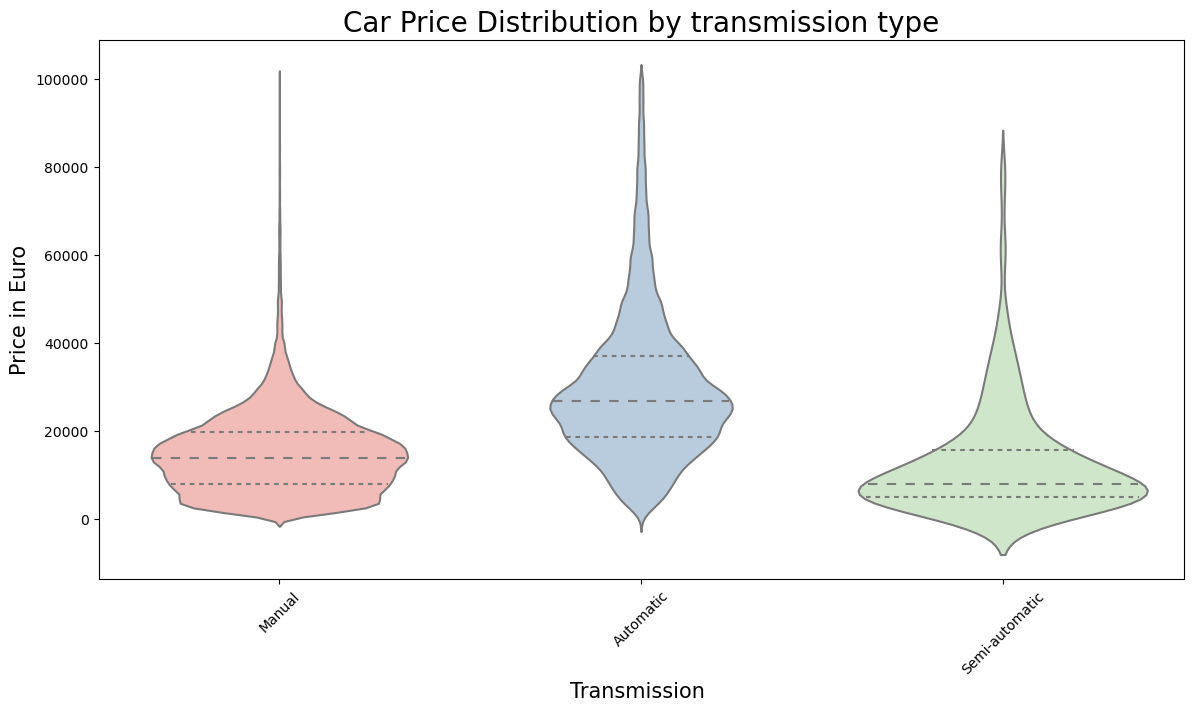

In [16]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='transmission_type', y='price_in_euro', data=df_red, inner='quartile', palette='Pastel1')
plt.title("Car Price Distribution by transmission type", fontsize=20)
plt.xlabel("Transmission ", fontsize=15)
plt.ylabel("Price in Euro", fontsize=15)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

### Color of the cars

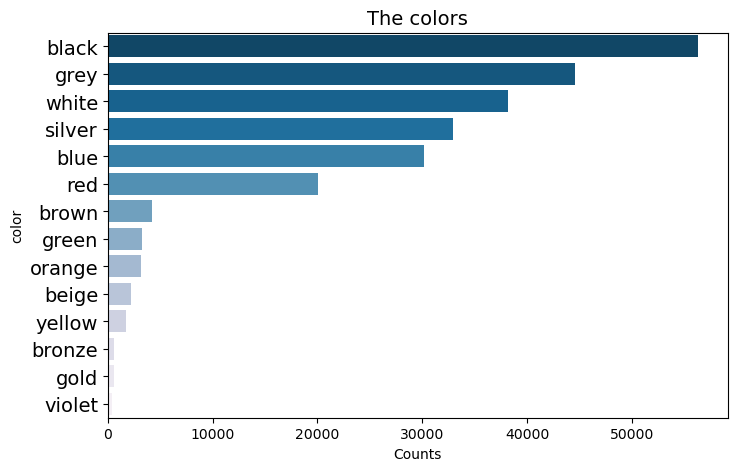

In [58]:
fig=plt.figure(figsize=(8,5))

# Get the counts of each brand and sort them
color_counts = df['color'].value_counts().sort_values(ascending=False)

# Plot the countplot with sorted order
sns.countplot(y=df['color'], order=color_counts.index, palette='PuBu_r')
plt.title('The colors', fontsize=14)
plt.xlabel('Counts')
plt.yticks(fontsize=14)
plt.show()








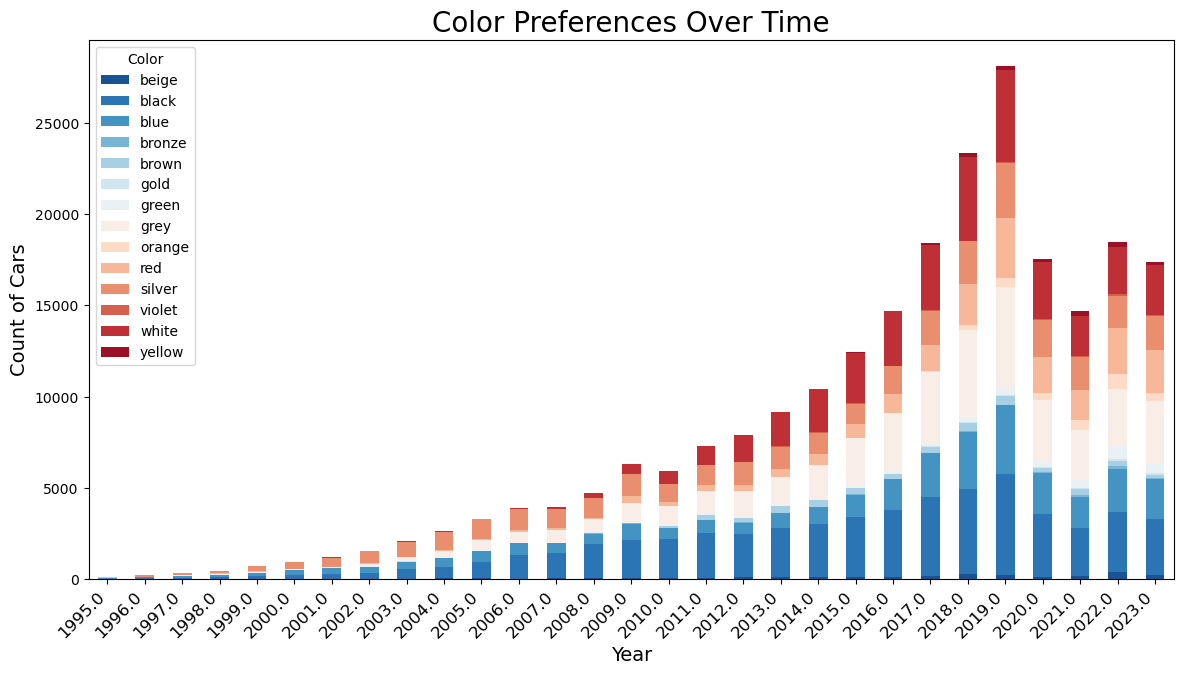

In [59]:
### #Group the data
color_data = df.groupby(['year', 'color']).size().unstack().fillna(0)

colors = sns.color_palette("RdBu_r", n_colors=len(color_data.columns))
# Create stacked bar plot using matplotlib
color_data.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.title("Color Preferences Over Time", fontsize=20)
plt.ylabel("Count of Cars", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="Color")
plt.show();








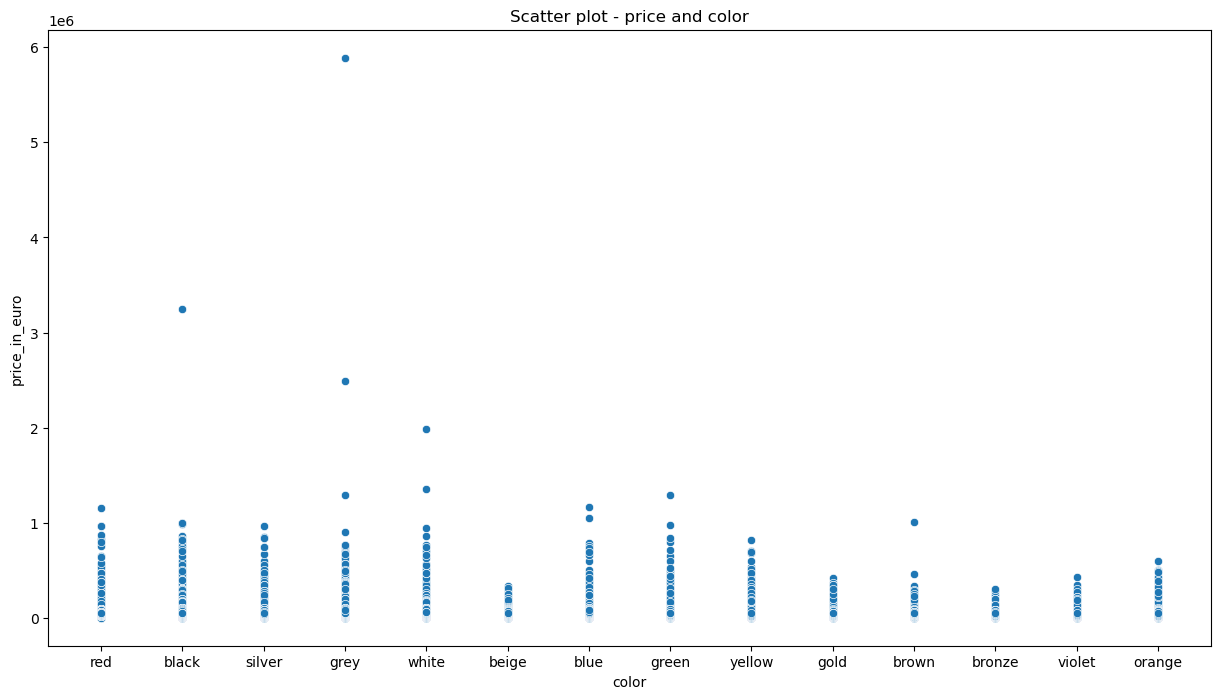

In [72]:
### Scatter plot between price and transmission type

fig=plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='color',y='price_in_euro')
plt.title('Scatter plot - price and color')
plt.show();
              

## We see, the most expensive cars wer grey, black, white and brown, as well as yellow. Bronze, beige and violet cars are never too expensive.

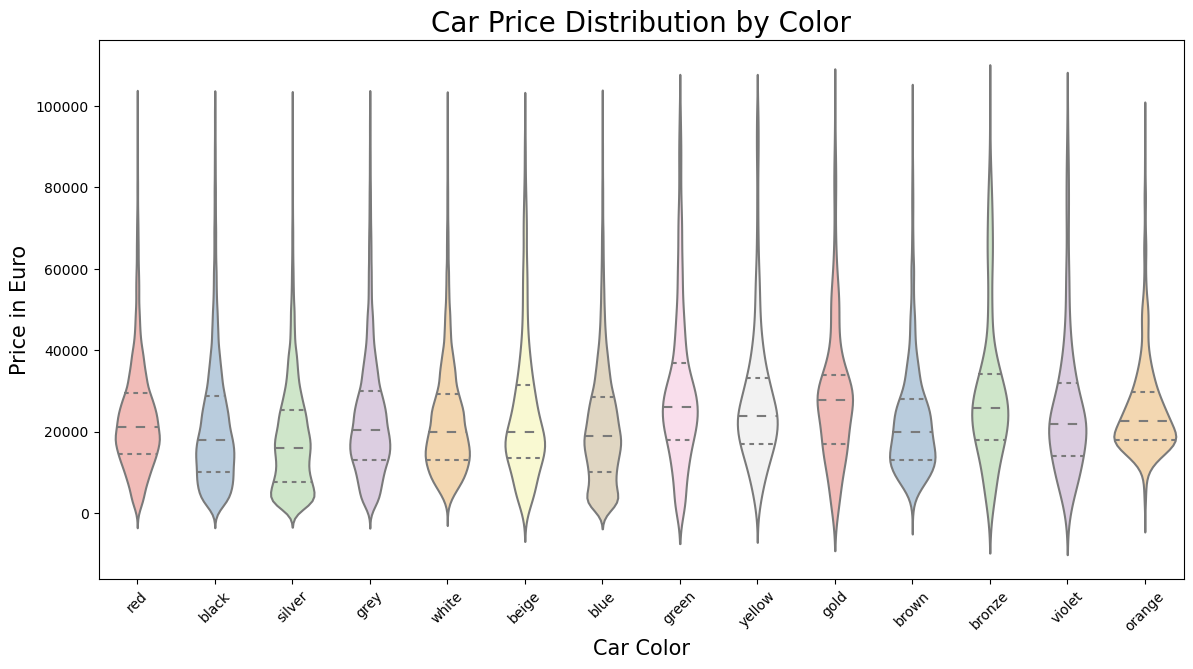

In [114]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='color', y='price_in_euro', data=df_red, inner='quartile', palette='Pastel1')
plt.title("Car Price Distribution by Color", fontsize=20)
plt.xlabel("Car Color", fontsize=15)
plt.ylabel("Price in Euro", fontsize=15)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [67]:
mercedes=df.loc[df['brand']=='mercedes-benz']
mercedes['model'].value_counts()

model
Mercedes-Benz C 180      1361
Mercedes-Benz C 200      1283
Mercedes-Benz C 220      1274
Mercedes-Benz E 220      1014
Mercedes-Benz E 200       933
                         ... 
Mercedes-Benz S 560 E       1
Mercedes-Benz SL 450        1
Mercedes-Benz V 280         1
Mercedes-Benz GL 400        1
Mercedes-Benz S 650         1
Name: count, Length: 261, dtype: int64

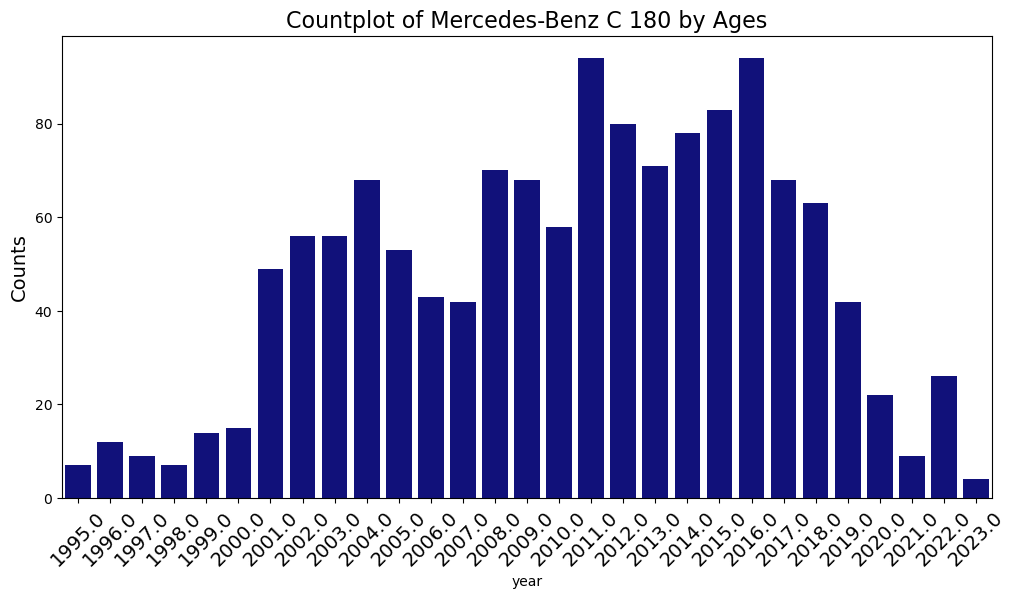

In [73]:
# Define the model and age range
model_to_filter = 'Mercedes-Benz C 180'  # Replace with your desired model

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='year', color='darkblue')
plt.title('Countplot of Mercedes-Benz C 180 by Ages', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Counts', fontsize=14)
#plt.xlabel('Years', fontsize=14)
plt.show()


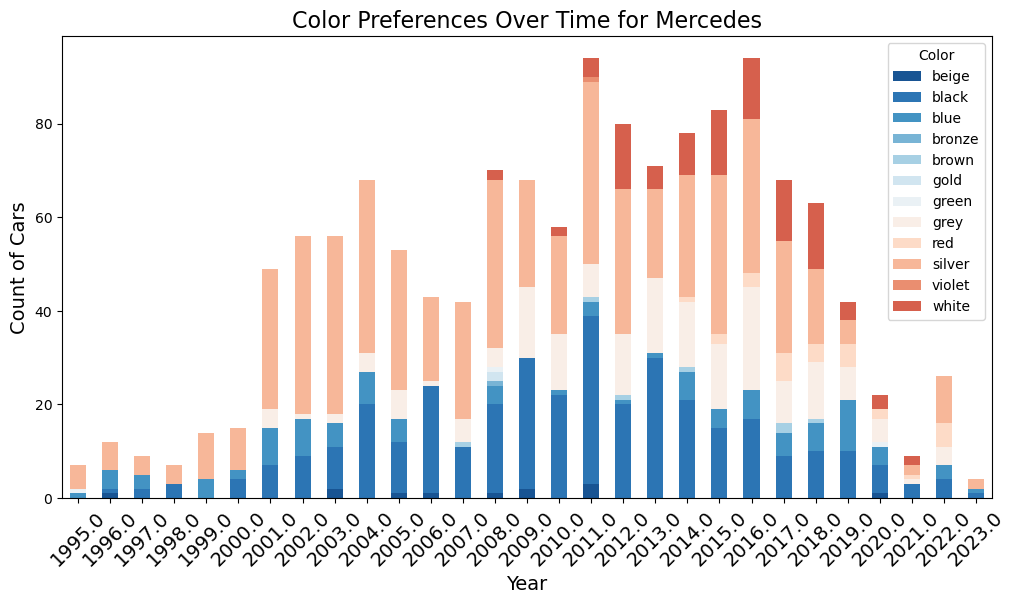

In [76]:
#Group the data
color_data_mercedes = filtered_df.groupby(['year', 'color']).size().unstack().fillna(0)

# Create stacked bar plot using matplotlib
color_data_mercedes.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title("Color Preferences Over Time for Mercedes", fontsize=16)
plt.ylabel("Count of Cars", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title="Color")
plt.show()

In [70]:
# Define the model and age range
#model_to_filter = 'Volkswagen Golf'  # Replace with your desired model
age_min = 1  # Minimum age
age_max = 28  # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max) & (df['price_in_euro']<200000)]

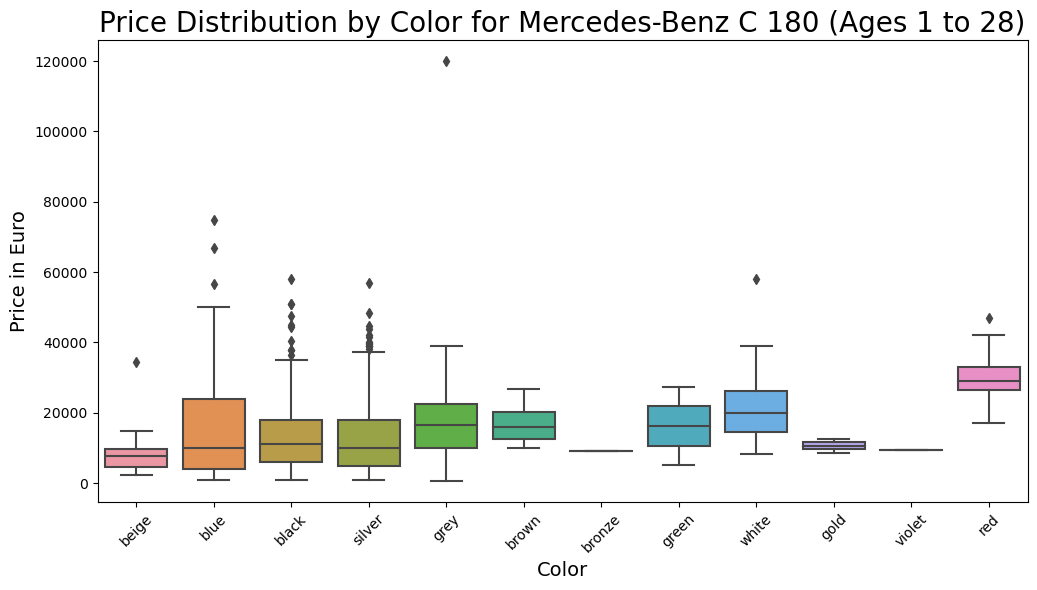

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='color', y='price_in_euro')
plt.title(f'Price Distribution by Color for {model_to_filter} (Ages {age_min} to {age_max})', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Price in Euro', fontsize=14)
plt.xlabel('Color', fontsize=14)
plt.show()

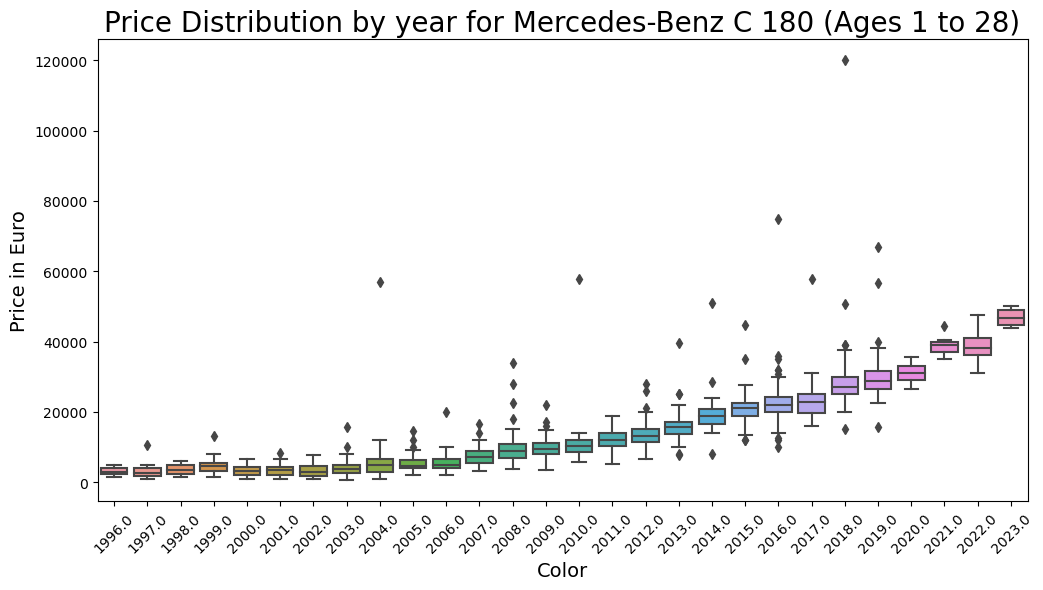

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='year', y='price_in_euro')
plt.title(f'Price Distribution by year for {model_to_filter} (Ages {age_min} to {age_max})', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Price in Euro', fontsize=14)
plt.xlabel('Color', fontsize=14)
plt.show()

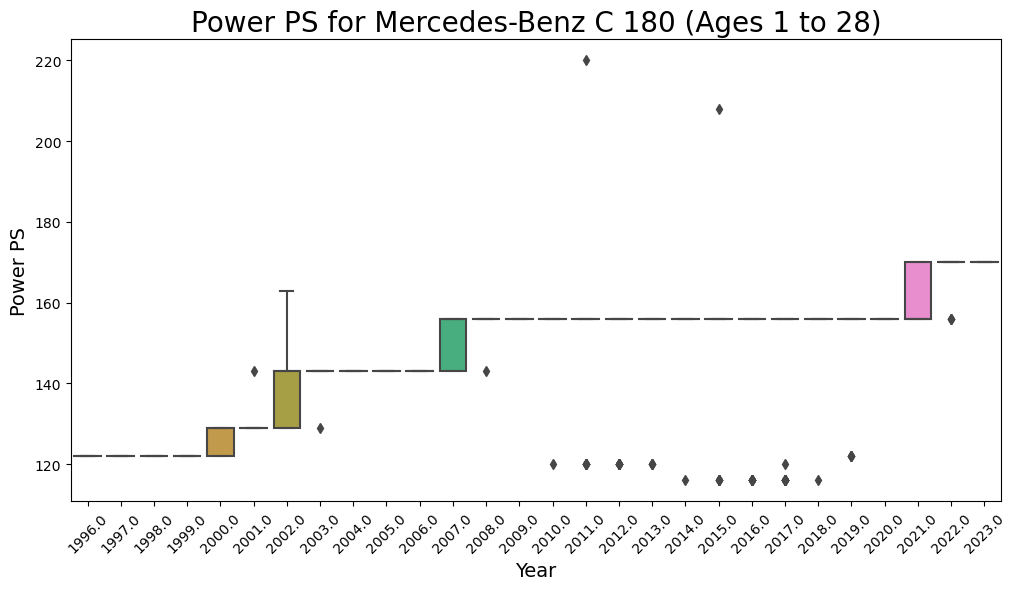

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='year', y='power_ps')
plt.title(f'Power PS for {model_to_filter} (Ages {age_min} to {age_max})', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Power PS', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

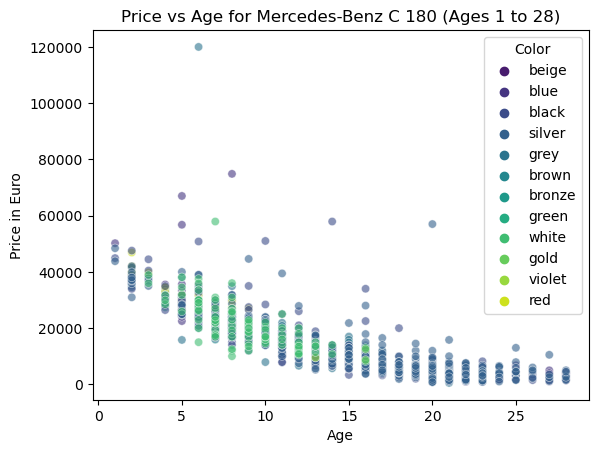

In [48]:
### plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='age', y='price_in_euro', hue='color', alpha=0.6, palette='viridis')
plt.title(f'Price vs Age for {model_to_filter} (Ages {age_min} to {age_max})')
plt.ylabel('Price in Euro')
plt.xlabel('Age')
plt.legend(title='Color')
plt.show()

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_64898/1324270355.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=filtered_df, x='age', y='power_ps', alpha=0.6, palette='viridis')


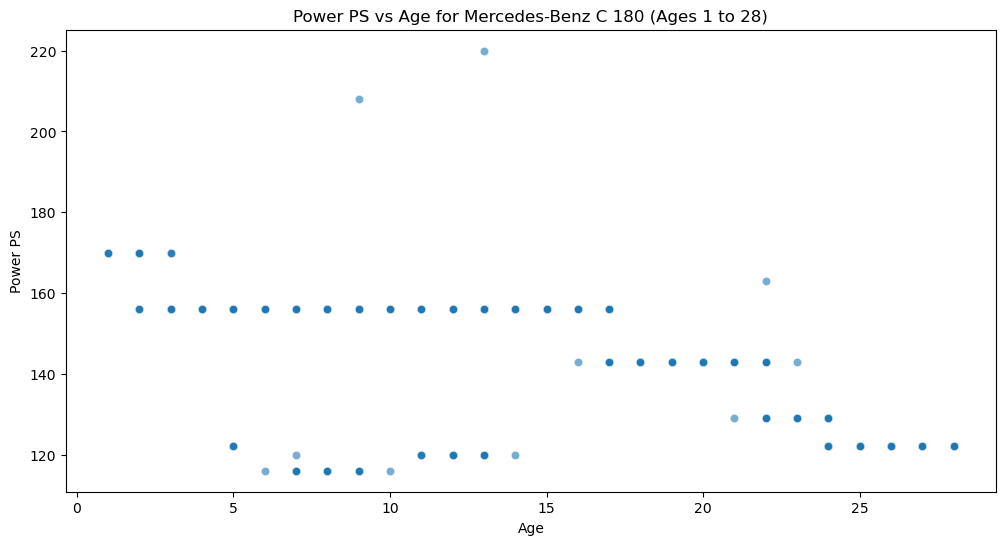

In [163]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='age', y='power_ps', alpha=0.6, palette='viridis')
plt.title(f'Power PS vs Age for {model_to_filter} (Ages {age_min} to {age_max})')
plt.ylabel('Power PS')
plt.xlabel('Age')

plt.show()

In [56]:


# Define the model and age range
#model_to_filter = 'Volkswagen Golf'  # Replace with your desired model
age_min = 8  # Minimum age
age_max = 8  # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max) & (df['price_in_euro']<200000)]

# Step 1: Convert categorical 'model' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)  # Drop first to avoid multicollinearity

# Step 2: Fit the ANOVA model
# Assuming 'price' is the dependent variable and we want to analyze how 'model' affects it
# Also include 'age' if you want to analyze it too
model = ols('price_in_euro ~ color_grey+color_red+color_white+ color_blue+color_silver ', data=filtered_df_dummies).fit()

# Step 3: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print('The ANOVA test results - colors, age for the price of ')
print('8 year old Mercedes-Benz C180')
# Print the ANOVA table
print(anova_table)

The ANOVA test results - colors, age for the price of 
8 year old Mercedes-Benz C180
                    sum_sq    df          F    PR(>F)
color_grey    6.495555e+07   1.0   1.520101  0.220815
color_red     1.014478e+08   1.0   2.374099  0.126872
color_white   3.703246e+07   1.0   0.866640  0.354378
color_blue    6.897688e+08   1.0  16.142094  0.000122
color_silver  1.095695e+08   1.0   2.564164  0.112815
Residual      3.845796e+09  90.0        NaN       NaN


## Blue color and age are both statistically significant factors influencing 7-9 years old Mercedes-Benz C180' prices in this analysis.
Other colors (brown, grey, red, white, silver) do not show a significant effect on car prices in this dataset (Mercedes-Benz C180, ages 7-9 years).

In [68]:
### Define the model and age range
#model_to_filter = 'Volkswagen Golf'  # Replace with your desired model
age_min = 8  # Minimum age
age_max = 8# Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max) & (df['price_in_euro']<200000)]

# Step 1: Convert categorical 'model' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)  # Drop first to avoid multicollinearity

# Step 2: Fit the ANOVA model
# Assuming 'price' is the dependent variable and we want to analyze how 'model' affects it
# Also include 'age' if you want to analyze it too
model = ols('price_in_euro ~' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')]), data=filtered_df_dummies).fit()

# Step 3: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print('The ANOVA test results - colors, age for the price of ')
print('8 year old Mercedes-Benz C180')
# Print the ANOVA table
print(anova_table)

The ANOVA test results - colors, age for the price of 
8 year old Mercedes-Benz C180
                    sum_sq    df          F    PR(>F)
color_blue    6.897688e+08   1.0  16.142094  0.000122
color_grey    6.495555e+07   1.0   1.520101  0.220815
color_red     1.014478e+08   1.0   2.374099  0.126872
color_silver  1.095695e+08   1.0   2.564164  0.112815
color_white   3.703246e+07   1.0   0.866640  0.354378
Residual      3.845796e+09  90.0        NaN       NaN


## Black color is statistically significant factor influencing car prices in this analysis.
Other colors (grey, blue, silver) as well as age do not show a significant effect on car prices in this dataset (Mercedes-benz C180, aged 19-20 years).

## I consider now another model, the most popular in Germany, and therefor I have a lot of data for it _Volkswagen Golf

In [86]:
# Define the model and age range
model_to_filter = 'Volkswagen Golf'  # Replace with your desired model
age_min = 1 # Minimum age
age_max = 1 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max) & (df['price_in_euro']<200000)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')]) 
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.378
Date:                Wed, 23 Oct 2024   Prob (F-statistic):              0.236
Time:                        20:13:48   Log-Likelihood:                -1570.3
No. Observations:                 149   AIC:                             3153.
Df Residuals:                     143   BIC:                             3171.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.089e+04 

In [87]:
print('The ANOVA test results - colors, age for the price of ')
print('1 year old Volkswagen Golf')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
1 year old Volkswagen Golf
                    sum_sq     df         F    PR(>F)
color_blue    1.971840e+08    1.0  2.266735  0.134384
color_grey    3.884295e+08    1.0  4.465204  0.036329
color_red     8.746243e+07    1.0  1.005427  0.317695
color_silver  3.083110e+08    1.0  3.544200  0.061785
color_white   4.000830e+08    1.0  4.599167  0.033678
Residual      1.243961e+10  143.0       NaN       NaN


In [79]:
# Define the model and age range
model_to_filter = 'Mercedes-Benz E 200'  # Replace with your desired model
age_min = 6 # Minimum age
age_max = 6 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max) & (df['price_in_euro']<200000)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')])
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     4.081
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           0.000484
Time:                        20:09:34   Log-Likelihood:                -852.07
No. Observations:                  80   AIC:                             1722.
Df Residuals:                      71   BIC:                             1744.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.52e+04 

In [80]:
print('The ANOVA test results - colors, age for the price of ')
print('6 year old Mercedes-Benz E200')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
6 year old Mercedes-Benz E200
                    sum_sq    df          F        PR(>F)
color_black   3.473418e+09   1.0  29.524426  7.354370e-07
color_blue    9.678574e+08   1.0   8.226892  5.430995e-03
color_bronze  2.974793e+08   1.0   2.528606  1.162422e-01
color_brown   3.664204e+08   1.0   3.114613  8.189344e-02
color_grey    1.380571e+09   1.0  11.735001  1.023189e-03
color_red     1.622852e+09   1.0  13.794418  4.028578e-04
color_silver  2.174963e+09   1.0  18.487424  5.356345e-05
color_white   1.421897e+09   1.0  12.086281  8.708101e-04
Residual      8.352835e+09  71.0        NaN           NaN


### Key Findings:
R-squared (0.556):
About 55.6% of the variability in car prices is explained by the model, which is decent. There are other factors not included in the model that could explain the remaining variability in prices.

Significant Color Variables:
The p-values for several color variables are below 0.05, indicating that these colors have a statistically significant effect on the price:

Black (coef = 11,130 EUR): Being black increases the price by about 11,130 EUR on average compared to the reference color.

Blue (coef = 10,110 EUR): Blue cars tend to be about 10,110 EUR more expensive.

Brown (coef = 7,571 EUR): Brown cars are also slightly more expensive by about 7,571 EUR.

Green (coef = 32,490 EUR): Green cars have a large impact on price, adding around 32,490 EUR.

Grey (coef = 9,627 EUR): Grey cars see an increase in price of around 9,627 EUR.

Red (coef = 15,160 EUR): Red adds a premium of about 15,160 EUR.

Silver (coef = 11,930 EUR): Silver cars are about 11,930 EUR more expensive.

White (coef = 10,380 EUR): White cars also add a premium of 10,380 EUR.

Non-significant Colors:
Bronze, violet, and yellow are not statistically significant at the 5% level, with p-values greater than 0.05. These colors do not have a meaningful impact on the price in this dataset.
Bronze: 6,797 EUR (not significant, p = 0.168)
Violet: 20,740 EUR (marginally significant, p = 0.051)
Yellow: -3,253 EUR (not significant, p = 0.443)

Age (coef = -2,165 EUR):
For each additional year of age, the price decreases by about 2,165 EUR, which is a highly significant result (p < 0.001). Age is negatively correlated with the price, as expected.
Intercept (35,090 EUR):
The intercept represents the estimated price of a reference car (with default settings for colors and age 0). In this case, the base price is approximately 35,090 EUR.
Overall Interpretation:
Color plays a significant role in determining the price of Merceds Benz E 200 cars. Colors like black, blue, red, green, grey, silver, and white have a statistically significant positive impact on price.
Age has a strong negative influence on price, with each additional year reducing the price by about 2,165 EUR.
Some colors (like bronze, yellow, and violet) do not show a strong enough effect on price in this particular dataset, likely due to lower frequency or variability.


In [88]:
# Define the model and age range
model_to_filter = 'Opel Astra'  # Replace with your desired model
age_min = 5 # Minimum age
age_max = 5 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')])
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.530
Date:                Wed, 23 Oct 2024   Prob (F-statistic):              0.154
Time:                        20:15:56   Log-Likelihood:                -5479.1
No. Observations:                 591   AIC:                         1.097e+04
Df Residuals:                     583   BIC:                         1.101e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.666e+04 

In [89]:
print('The ANOVA test results - colors, age for the price of ')
print('5 years old Opel Astra')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
5 years old Opel Astra
                    sum_sq     df         F    PR(>F)
color_blue    4.661771e+06    1.0  0.695802  0.404540
color_brown   3.895810e+05    1.0  0.058148  0.809533
color_green   8.341494e+05    1.0  0.124503  0.724329
color_grey    1.862763e+07    1.0  2.780304  0.095967
color_red     3.470575e+06    1.0  0.518008  0.471981
color_silver  5.172836e+07    1.0  7.720821  0.005635
color_white   6.498658e+06    1.0  0.969970  0.325096
Residual      3.906014e+09  583.0       NaN       NaN


## These are results for Opel Astra 5 years old, and we see the significance of silver color, negative for the price.

In [198]:
filtered_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 218702 to 220522
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     411 non-null    object 
 1   model                     411 non-null    object 
 2   registration_date         411 non-null    object 
 3   year                      411 non-null    int64  
 4   price_in_euro             411 non-null    float64
 5   power_kw                  411 non-null    float64
 6   power_ps                  411 non-null    float64
 7   transmission_type         411 non-null    object 
 8   fuel_type                 411 non-null    object 
 9   fuel_consumption_l_100km  411 non-null    float64
 10  fuel_consumption_g_km     411 non-null    object 
 11  mileage_in_km             411 non-null    float64
 12  offer_description         411 non-null    object 
 13  age                       411 non-null    int64  
 14  color_b

In [108]:
# Define the model and age range
model_to_filter = 'Audi A3'  # Replace with your desired model
age_min = 10 # Minimum age
age_max = 10 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')]) 
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.480
Date:                Wed, 23 Oct 2024   Prob (F-statistic):             0.0236
Time:                        20:47:37   Log-Likelihood:                -2727.8
No. Observations:                 288   AIC:                             5470.
Df Residuals:                     281   BIC:                             5495.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.461e+04 

In [109]:
print('The ANOVA test results - colors, age for the price of ')
print('10 years old Audi A3')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
10 years old Audi A3
                    sum_sq     df         F    PR(>F)
color_blue    8.950592e+07    1.0  8.847459  0.003190
color_brown   2.794534e+07    1.0  2.762334  0.097622
color_grey    5.476948e+07    1.0  5.413840  0.020689
color_red     1.999829e+07    1.0  1.976786  0.160834
color_silver  8.045229e+07    1.0  7.952527  0.005144
color_white   1.752746e+07    1.0  1.732549  0.189158
Residual      2.842756e+09  281.0       NaN       NaN


## For the Audi A3 dataset, the regression model presents some interesting results on how the car's color and age impact its price. Here’s a breakdown of the key findings from the OLS Regression Results:

Key Findings:

R-squared (0.668):
The model explains about 66.8% of the variability in the price of the Audi A3. This indicates that the selected factors (color and age) account for a significant portion of the price variance, but some factors influencing price are not included in the model.

Significant Variables:
Color Bronze (coef = 23,800 EUR, p < 0.001): The most significant color, with a substantial positive impact on price. Cars with bronze color tend to be about 23,800 EUR more expensive than the reference color.
Color Yellow (coef = 4,669 EUR, p = 0.018): Yellow cars also have a significant positive effect on price, increasing it by around 4,669 EUR.

Age (coef = -1,679 EUR, p < 0.001): Age is highly significant, with each additional year reducing the price by about 1,679 EUR. This is a strong negative relationship, as expected for car depreciation over time.

Non-significant Colors:
The following colors do not significantly affect the price (p-values > 0.05):
Black, Blue, Brown, Gold, Green, Grey, Orange, Red, Silver, Violet, White
Despite the large coefficients for some colors, such as Bronze and Yellow, other colors show no statistically significant effect on price.

Intercept (coef = 34,120 EUR):
The intercept represents the estimated base price of an Audi A3 in the reference color with age factored in. In this case, the base price is around 34,120 EUR for the reference group.

Interpretation:
Bronze and Yellow are the only two colors that significantly impact the price of an Audi A3 in this dataset. Bronze has a very large premium compared to other colors, and yellow adds a notable but smaller premium.
Age has a strong, consistent negative influence on the price, which is typical for car depreciation.
Other colors, despite some having positive or negative coefficients, are not statistically significant at the 5% level, meaning that their effect on price cannot be confidently distinguished from zero in this dataset.

Conclusion:
In this analysis, color Bronze is the most valuable in terms of increasing the price of the Audi A3, followed by Yellow. As expected, age plays a crucial role in decreasing the car’s value as it gets older.







In [227]:
lamborghini=df.loc[df['brand']=='lamborghini']
lamborghini['model'].unique()

array(['Lamborghini Murciélago', 'Lamborghini Gallardo', 'Lamborghini',
       'Lamborghini Aventador', 'Lamborghini Huracan', 'Lamborghini Urus'],
      dtype=object)

In [284]:
# Define the model and age range
model_to_filter = 'Lamborghini Aventador'  # Replace with your desired model
age_min = 6  # Minimum age
age_max = 6 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')])
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.160
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.390
Time:                        13:20:16   Log-Likelihood:                -132.79
No. Observations:                  11   AIC:                             273.6
Df Residuals:                       7   BIC:                             275.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.522e+05 

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [112]:
# Define the model and age range
model_to_filter = 'Ford Focus'  # Replace with your desired model
age_min = 5 # Minimum age
age_max = 5 # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regression model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')]) 
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.906
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.74e-07
Time:                        20:49:18   Log-Likelihood:                -5820.2
No. Observations:                 589   AIC:                         1.166e+04
Df Residuals:                     577   BIC:                         1.172e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.558e+04 

In [115]:
print('The ANOVA test results - colors, age for the price of ')
print('5 years old Ford Focus')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
5 years old Ford Focus
                    sum_sq     df          F    PR(>F)
color_black   1.104018e+08    1.0   4.825082  0.028446
color_blue    1.046222e+08    1.0   4.572488  0.032909
color_bronze  2.276968e+07    1.0   0.995143  0.318907
color_brown   6.462171e+07    1.0   2.824276  0.093390
color_grey    1.466306e+08    1.0   6.408456  0.011622
color_orange  3.389722e+08    1.0  14.814696  0.000132
color_red     1.114606e+08    1.0   4.871359  0.027699
color_silver  3.762212e+07    1.0   1.644265  0.200256
color_violet  2.276968e+07    1.0   0.995143  0.318907
color_white   6.437618e+07    1.0   2.813545  0.094013
color_yellow  2.276968e+07    1.0   0.995143  0.318907
Residual      1.320222e+10  577.0        NaN       NaN


In [241]:
porsche=df.loc[df['brand']=='porsche']
porsche['model'].unique()

array(['Porsche 911', 'Porsche 993', 'Porsche Boxster', 'Porsche 996',
       'Porsche Cayenne', 'Porsche Targa', 'Porsche 997',
       'Porsche Carrera GT', 'Porsche Cayman', 'Porsche Panamera',
       'Porsche 991', 'Porsche Macan', 'Porsche 918', 'Porsche 718',
       'Porsche', 'Porsche 992', 'Porsche 718 Spyder'], dtype=object)

In [116]:
# Define the model and age range
model_to_filter = 'Porsche Cayenne'  # Replace with your desired model
age_min = 8  # Minimum age
age_max = 8  # Maximum age

# Filter the DataFrame
filtered_df = df[(df['model'] == model_to_filter) & 
                  (df['age'] >= age_min) & 
                  (df['age'] <= age_max)]

# Step 2: Convert categorical 'color' to dummy variables
filtered_df_dummies = pd.get_dummies(filtered_df, columns=['color'], drop_first=True)

# Step 3: Fit the regressbion model
# Assume 'price_in_euro' is the dependent variable
# The formula will include all color dummies and age
formula = 'price_in_euro ~ ' + ' + '.join(filtered_df_dummies.columns[filtered_df_dummies.columns.str.startswith('color_')])
model = ols(formula, data=filtered_df_dummies).fit()

# Step 4: Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.346
Date:                Wed, 23 Oct 2024   Prob (F-statistic):             0.0125
Time:                        20:54:23   Log-Likelihood:                -1342.9
No. Observations:                 119   AIC:                             2696.
Df Residuals:                     114   BIC:                             2710.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.211e+04 

In [118]:
print('The ANOVA test results - colors, age for the price of ')
print('8 years Porsche Cayenne')
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

The ANOVA test results - colors, age for the price of 
8 years Porsche Cayenne
                    sum_sq     df         F    PR(>F)
color_blue    8.852848e+07    1.0  0.228530  0.633532
color_grey    6.348352e+08    1.0  1.638779  0.203092
color_silver  3.831779e+09    1.0  9.891450  0.002118
color_white   2.819896e+08    1.0  0.727935  0.395342
Residual      4.416166e+10  114.0       NaN       NaN


In [266]:
filtered_df.shape

(119, 15)

In [267]:
formula_simple = 'price_in_euro ~ age'
model_simple = ols(formula_simple, data=filtered_df_dummies).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:          price_in_euro   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 14 Oct 2024   Prob (F-statistic):                nan
Time:                        13:07:32   Log-Likelihood:                -1349.5
No. Observations:                 119   AIC:                             2701.
Df Residuals:                     118   BIC:                             2704.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    823.9410     28.840     28.569      0.0

## All these examples show that in some cases the color of the car adda some values or decrease it. Not always, not for every model, not every year, but it is meaningfull to keep it for the next step, machine learning.